In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)

df = pd.read_csv(r'C:\Users\imffb\project\EDA\starting_point.csv')
df = df.drop(columns=['Unnamed: 0'])

df['Sqft'] = df['Sqft'].str.replace('+', '-5000')
df['Sqft'] = df['Sqft'].str.split('-').str[0].astype(int) + df['Sqft'].str.split('-').str[1].astype(int).astype(int)
df['Sqft'] = (df['Sqft'].astype(int)/2).astype(int)
#df.dropna(subset=['Sqft'], inplace=True)

#df.dropna(subset=['Timestamp_sql'], inplace=True)
df['year'] = pd.DatetimeIndex(df['Timestamp_sql']).year
df['month'] = pd.DatetimeIndex(df['Timestamp_sql']).month
df = df.sort_values(by=['year','month'])
df['Input_year_month'] = df['year'].astype('str') + '-' + df['month'].astype(str)

display(df)

<ipython-input-1-edd2d39c8279>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sqft'] = df['Sqft'].str.replace('+', '-5000')


Ml_num             Input_date   Orig_dol               Pix_updt  \
248863  C4440172  2019-05-06 00:00:00.0     4500.0  2020-04-09 17:19:15.0   
248865  C4525170  2019-07-22 00:00:00.0     3200.0  2019-07-22 14:29:12.0   
248866  C4525604  2019-07-22 00:00:00.0  1100000.0  2020-04-21 08:41:01.0   
248876  C4608450  2019-10-16 00:00:00.0  1665140.0  2019-10-23 12:21:16.0   
248878  C4621705  2019-10-30 00:00:00.0     5600.0  2020-04-20 16:56:03.0   
...          ...                    ...        ...                    ...   
147218  X5603602  2022-05-04 00:00:00.0   499900.0  2022-05-04 15:36:39.0   
147219  X5603725  2022-05-04 00:00:00.0   579000.0  2022-05-04 16:30:23.0   
147220  X5603772  2022-05-04 00:00:00.0   739900.0  2022-05-04 16:48:13.0   
147221  X5603947  2022-05-04 00:00:00.0     2600.0  2022-05-04 20:09:33.0   
147222  X5603965  2022-05-04 00:00:00.0   799999.0  2022-05-04 20:29:22.0   

         Lp_dol  Sp_dol          Timestamp_sql   Td  Lsc    S_r  Br  Br_plus  \
248863     2700     NaN  2020-05-25 12:08:25.0  NaN  Sus  Lease   1        1   
248865     2700     NaN  2020-05-16 00:05:20.0  NaN  Exp  Lease   1        0   
248866  1100000     NaN  2020-05-23 00:05:02.0  NaN  Exp   Sale   2        1   
248876  1665140     NaN  2020-05-31 00:05:07.0  NaN  Exp   Sale   3        0   
248878     3300     NaN  2020-05-25 12:07:44.0  NaN  Sus  Lease   2        0   
...         ...     ...                    ...  ...  ...    ...  ..      ...   
147218   499900     NaN  2022-05-04 15:36:23.0  NaN  New   Sale   2        0   
147219   579000     NaN  2022-05-04 16:30:09.0  NaN  New   Sale   2        0   
147220   739900     NaN  2022-05-04 17:26:27.0  NaN  New   Sale   3        0   
147221     2600     NaN  2022-05-04 20:09:09.0  NaN  New  Lease   3        0   
147222   799999     NaN  2022-05-04 21:33:34.0  NaN  New   Sale   3        0   

        Bath_tot  Num_kit  Den_fr  Sqft Yr_built  Furnished Patio_ter  \
248863         1        1       1   949     6-15          2      Open   
248865         1        1       0   249      0-5          2      None   
248866         4        1       0  1299      0-5          0      Open   
248876         2        1       0  1499      0-5          0      Terr   
248878         2        1       0  1099     6-15          2      Open   
...          ...      ...     ...   ...      ...        ...       ...   
147218         2        1       0   849      0-5          0      Open   
147219         2        1       1   849     6-15          0      Terr   
147220         2        1       1  1299     6-15          0      None   
147221         3        1       0  1699     6-15          0      Terr   
147222         3        1       1  1299     6-15          0      None   

             Type_own1_out Condo_exp  Locker   Maint Tot_park_spcs  \
248863           Condo Apt         W       0    0.00             1   
248865           Condo Apt         W       1    0.00             0   
248866     Condo Townhouse         S       1  835.00             1   
248876           Condo Apt        SW       1  895.06             0   
248878           Condo Apt         W       0    0.00             1   
...                    ...       ...     ...     ...           ...   
147218           Condo Apt         W       1  324.50             1   
147219  Comm Element Condo         W       1  448.06             1   
147220     Condo Townhouse         S       0  367.00             2   
147221     Condo Townhouse        SW       0    0.00             2   
147222     Condo Townhouse         W       0  216.63             2   

           Parking Type  Ens_lndry Cable Internet Insur_bldg Water_inc  \
248863      Underground          1     Y        Y          Y         Y   
248865             None          0     Y        Y          Y         Y   
248866      Underground          1     N        Y          Y         N   
248876             None          1     N        Y          Y         Y   
248878      Underground          1  

Approx Square Footage and Approx Age columns were ranges, so I changed them to their indexes in relation to all square footages, to test for relevancy. Null values are removed.

In [2]:
df_sale = df[df['S_r'] == 'Sale']
df_lease = df[df['S_r'] == 'Lease']

In [3]:
df_lease=df_lease[df_lease['Sqft']!='+5000']
df_lease.reset_index(inplace=True, drop=True)

display(df_lease)

Ml_num             Input_date  Orig_dol               Pix_updt  \
0       C4440172  2019-05-06 00:00:00.0    4500.0  2020-04-09 17:19:15.0   
1       C4525170  2019-07-22 00:00:00.0    3200.0  2019-07-22 14:29:12.0   
2       C4621705  2019-10-30 00:00:00.0    5600.0  2020-04-20 16:56:03.0   
3       C4636313  2019-11-18 00:00:00.0    2050.0  2019-11-18 05:57:02.0   
4       C4638382  2019-11-20 00:00:00.0    6300.0  2019-11-20 11:03:46.0   
...          ...                    ...       ...                    ...   
173271  X5601781  2022-05-03 00:00:00.0    2700.0  2022-05-03 21:55:07.0   
173272  X5602705  2022-05-04 00:00:00.0    2900.0  2022-05-04 10:25:13.0   
173273  X5603065  2022-05-04 00:00:00.0    2800.0  2022-05-04 12:10:55.0   
173274  X5603221  2022-05-04 00:00:00.0    3000.0  2022-05-04 12:58:07.0   
173275  X5603947  2022-05-04 00:00:00.0    2600.0  2022-05-04 20:09:33.0   

        Lp_dol  Sp_dol          Timestamp_sql                     Td  Lsc  \
0         2700     NaN  2020-05-25 12:08:25.0                    NaN  Sus   
1         2700     NaN  2020-05-16 00:05:20.0                    NaN  Exp   
2         3300     NaN  2020-05-25 12:07:44.0                    NaN  Sus   
3         1950  1800.0  2020-05-24 16:18:59.0  2020-07-03 00:00:00.0  Lsd   
4         5900  5200.0  2020-05-27 18:11:00.0  2020-07-01 00:00:00.0  Lsd   
...        ...     ...                    ...                    ...  ...   
173271    2700     NaN  2022-05-03 21:55:02.0                    NaN  New   
173272    2900     NaN  2022-05-04 10:24:48.0                    NaN  New   
173273    2800     NaN  2022-05-04 12:10:49.0                    NaN  New   
173274    3000     NaN  2022-05-04 12:57:50.0                    NaN  New   
173275    2600     NaN  2022-05-04 20:09:09.0                    NaN  New   

          S_r  Br  Br_plus  Bath_tot  Num_kit  Den_fr  Sqft Yr_built  \
0       Lease   1        1         1        1       1   949     6-15   
1       Lease   1        0         1        1       0   249      0-5   
2       Lease   2        0         2        1       0  1099     6-15   
3       Lease   1        0         1        1       0   549     6-15   
4       Lease   2        0         3        1       0  1899      0-5   
...       ...  ..      ...       ...      ...     ...   ...      ...   
173271  Lease   2        0         2        1       0  1299     6-15   
173272  Lease   3        0         2        1       0  1499      0-5   
173273  Lease   2        0         2        1       0   849    16-30   
173274  Lease   4        0         3        1       0  1499     6-15   
173275  Lease   3        0         3        1       0  1699     6-15   

        Furnished Patio_ter    Type_own1_out Condo_exp  Locker  Maint  \
0               2      Open        Condo Apt         W       0    0.0   
1               2      None        Condo Apt         W       1    0.0   
2               2      Open        Condo Apt         W       0    0.0   
3               0      Open        Condo Apt         W       1    0.0   
4               0      Terr        Condo Apt         W       0    0.0   
...           ...       ...              ...       ...     ...    ...   
173271          0      Open  Condo Townhouse         N       0  110.0   
173272          0      Terr  Condo Townhouse         S       0    0.0   
173273          0      Open        Condo Apt         N       1    0.0   
173274          0      Terr  Condo Townhouse         N       0    0.0   
173275          0      Terr  Condo Townhouse        SW       0    0.0   

       Tot_park_spcs     Parking Type  Ens_lndry Cable Internet Insur_bldg  \
0                  1      Underground          1     Y        Y          Y   
1                  0             None          0     Y        Y          Y   
2                  1      Underground          1     Y        Y          Y   
3                  1      Underground          1     N        Y          Y   
4                  1            Other   

In [4]:
percentile01 = df_lease['Lp_dol'].quantile(0.01)
print(percentile01)

index_to_review=df_lease[df_lease['Lp_dol']<percentile01].index
total_idx_to_drop=[]

for index in index_to_review:
    if (((df_lease.loc[index, 'Br']==0)
         and (df_lease.loc[index, 'Bath_tot']==0)
         and (df_lease.loc[index, 'Num_kit']==0)
         and ((df_lease.loc[index, 'Tot_park_spcs']=='1')or(df_lease.loc[index, 'Locker']==1)))
         or(df_lease.loc[index, 'Type_own1_out']=='Parking Space')
         or(df_lease.loc[index, 'Type_own1_out']=='Other')
         or(df_lease.loc[index, 'Type_own1_out']=='Locker')
         or(df_lease.loc[index, 'Type_own1_out']=='Room')):
        pass

        
    elif str(df_lease.loc[index, 'Sp_dol'])=='nan':
        if df_lease.loc[index, 'Orig_dol']<percentile01:
            
#             print(index,'take out')
            total_idx_to_drop.append(index)
        else:
            df_lease.loc[index,'Lp_dol']=df_lease.loc[index, 'Orig_dol']
            
    elif str(df_lease.loc[index, 'Sp_dol'])!='nan':
        if df_lease.loc[index, 'Sp_dol']<percentile01:
            if ((df_lease.loc[index, 'Br']<=1)and (df_lease.loc[index, 'Bath_tot']==1)):
                pass
            else:
                total_idx_to_drop.append(index)
        else:
            df_lease.loc[index,'Lp_dol']=df_lease.loc[index, 'Sp_dol']
            




display(df_lease[df_lease['Lp_dol']<percentile01])
print(df_lease[df_lease['Lp_dol']<percentile01].shape)
print(len(total_idx_to_drop))

1420.0


Ml_num             Input_date  Orig_dol               Pix_updt  \
1079    C4738755  2020-04-07 00:00:00.0    1200.0  2020-05-04 21:56:28.0   
1147    C4740397  2020-04-09 00:00:00.0    1200.0  2020-04-09 16:37:16.0   
1958    C4752836  2020-05-02 00:00:00.0    1400.0  2020-05-02 20:41:01.0   
2518    C4761706  2020-05-14 00:00:00.0    1400.0  2020-05-14 16:32:48.0   
2727    C4769802  2020-05-25 00:00:00.0     900.0  2020-05-25 20:05:15.0   
...          ...                    ...       ...                    ...   
172271  C5602159  2022-05-03 00:00:00.0     200.0  2022-05-03 20:55:54.0   
172485  E5577697  2022-04-14 00:00:00.0    1375.0  2022-04-14 11:23:30.0   
172597  E5602236  2022-05-03 00:00:00.0    1000.0  2022-05-03 23:28:22.0   
172641  N5576998  2022-04-13 00:00:00.0    1300.0  2022-04-14 11:06:45.0   
173059  W5598792  2022-05-01 00:00:00.0    1300.0  2022-05-01 18:29:49.0   

        Lp_dol  Sp_dol          Timestamp_sql                     Td  Lsc  \
1079      1200     NaN  2020-05-13 12:23:04.0                    NaN  Sus   
1147      1100     NaN  2020-05-25 12:28:48.0                    NaN  Sus   
1958      1400     NaN  2020-05-16 10:03:41.0                    NaN  Ter   
2518      1400  1400.0  2020-05-22 08:29:25.0  2020-06-15 00:00:00.0  Lsd   
2727       900     NaN  2020-05-30 13:16:06.0                    NaN  Ter   
...        ...     ...                    ...                    ...  ...   
172271     200     NaN  2022-05-03 20:55:55.0                    NaN  New   
172485    1375  1375.0  2022-05-04 13:16:40.0  2022-05-13 00:00:00.0  Lsd   
172597    1000     NaN  2022-05-03 23:28:04.0                    NaN  New   
172641    1300     NaN  2022-05-02 09:08:51.0                    NaN  Ter   
173059    1300     NaN  2022-05-01 18:47:08.0                    NaN  New   

          S_r  Br  Br_plus  Bath_tot  Num_kit  Den_fr  Sqft Yr_built  \
1079    Lease   2        0         1        1       0   249     6-15   
1147    Lease   1        0         1        1       0   749      0-5   
1958    Lease   1        0         1        1       0   749     6-15   
2518    Lease   1        0         1        1       0   849    16-30   
2727    Lease   1        1         1        1       0   849     6-15   
...       ...  ..      ...       ...      ...     ...   ...      ...   
172271  Lease   0        0         0        0       0   249     6-15   
172485  Lease   0        0         1        1       0   249     6-15   
172597  Lease   0        0         1        1       0   249    16-30   
172641  Lease   0        0         1        1       0   249     6-15   
173059  Lease   1        0         1        1       1  1499     6-15   

        Furnished Patio_ter    Type_own1_out Condo_exp  Locker  Maint  \
1079            2      Open        Condo Apt        SE       0    0.0   
1147            2      Open             Room        NW       0    0.0   
1958            0      Open        Condo Apt         S       1    0.0   
2518            1      Open        Condo Apt        SW       0    0.0   
2727            0      None  Condo Townhouse         S       0    0.0   
...           ...       ...              ...       ...     ...    ...   
172271          0      None        Condo Apt        SW       0    0.0   
172485          2      None        Condo Apt         W       0    0.0   
172597          0      None  Condo Townhouse         S       0    0.0   
172641          0      None  Leasehold Condo         N       1    0.0   
173059          0      None  Condo Townhouse        NE       0    0.0   

       Tot_park_spcs Parking Type  Ens_lndry Cable Internet Insur_bldg  \
1079               0         None          1     N        Y          Y   
1147               0         None          1     N        Y          Y   
1958               0         None          1     N        Y          Y   
2518               0         None          1     N        Y          Y   
2727               0         None          0     Y        Y 

(1565, 46)
504


In [5]:
df_lease.drop(df_lease.loc[total_idx_to_drop].index, inplace=True)
df_lease = df_lease.drop(['Ml_num', 'Internet', 'Insur_bldg', 'Water_inc', 'Cac_inc', 'Comel_inc', 'Heat_inc', 'Hydro_inc', 'Fuel', 'Heating'], axis=1)
df_lease.drop(['Addr','Taxes', 'Maint', 'County', 'Pix_updt', 'Sp_dol', 'Input_date', 'Td', 'Lsc', 'Orig_dol', 'Yr_built', 'year', 'month'], axis=1, inplace=True)
df_lease.reset_index(inplace=True, drop=True)

In [6]:
percentile1 = df_lease['Lp_dol'].quantile(0.01)
percentile99 = df_lease['Lp_dol'].quantile(0.99)

iqr=percentile99-percentile1

upper_limit = percentile99 + 1.5 * iqr
lower_limit = max(0, percentile1 - 1.5 * iqr)
print(upper_limit,lower_limit)

df_lease=df_lease[df_lease['Lp_dol']< upper_limit]
df_lease.reset_index(inplace=True, drop=True)

df_lease=df_lease[df_lease['Lp_dol']> lower_limit]
df_lease.reset_index(inplace=True, drop=True)

11287.5 0


In [7]:
df_lease

Lp_dol          Timestamp_sql    S_r  Br  Br_plus  Bath_tot  Num_kit  \
0         2700  2020-05-25 12:08:25.0  Lease   1        1         1        1   
1         2700  2020-05-16 00:05:20.0  Lease   1        0         1        1   
2         3300  2020-05-25 12:07:44.0  Lease   2        0         2        1   
3         1950  2020-05-24 16:18:59.0  Lease   1        0         1        1   
4         5900  2020-05-27 18:11:00.0  Lease   2        0         3        1   
...        ...                    ...    ...  ..      ...       ...      ...   
172593    2700  2022-05-03 21:55:02.0  Lease   2        0         2        1   
172594    2900  2022-05-04 10:24:48.0  Lease   3        0         2        1   
172595    2800  2022-05-04 12:10:49.0  Lease   2        0         2        1   
172596    3000  2022-05-04 12:57:50.0  Lease   4        0         3        1   
172597    2600  2022-05-04 20:09:09.0  Lease   3        0         3        1   

        Den_fr  Sqft  Furnished Patio_ter    Type_own1_out Condo_exp  Locker  \
0            1   949          2      Open        Condo Apt         W       0   
1            0   249          2      None        Condo Apt         W       1   
2            0  1099          2      Open        Condo Apt         W       0   
3            0   549          0      Open        Condo Apt         W       1   
4            0  1899          0      Terr        Condo Apt         W       0   
...        ...   ...        ...       ...              ...       ...     ...   
172593       0  1299          0      Open  Condo Townhouse         N       0   
172594       0  1499          0      Terr  Condo Townhouse         S       0   
172595       0   849          0      Open        Condo Apt         N       1   
172596       0  1499          0      Terr  Condo Townhouse         N       0   
172597       0  1699          0      Terr  Condo Townhouse        SW       0   

       Tot_park_spcs     Parking Type  Ens_lndry Cable Prkg_inc  A_c  \
0                  1      Underground          1     Y        N    1   
1                  0             None          0     Y        N    1   
2                  1      Underground          1     Y        N    1   
3                  1      Underground          1     N        Y    1   
4                  1            Other          1     N        Y    1   
...              ...              ...        ...   ...      ...  ...   
172593             2  Attached Garage          1     N        Y    1   
172594             1           Garage          1     N        Y    1   
172595             1      Underground          1     N        N    1   
172596             2  Attached Garage          1     N        Y    1   
172597             2  Attached Garage          1     N        Y    1   

       Zip_modified Municipality Input_year_month  
0               M2N      Toronto           2020-5  
1               M5R      Toronto           2020-5  
2               M2N      Toronto           2020-5  
3               M2N      Toronto           2020-5  
4               M5E      Toronto           2020-5  
...             ...          ...              ...  
172593          L0R     Hamilton           2022-5  
172594          L0R     Hamilton           2022-5  
172595          L8P     Hamilton           2022-5  
172596          L8E     Hamilton           2022-5  
172597          L8H     Hamilton           2022-5  

[172598 rows x 23 columns]

In [8]:
df_lease.dropna(inplace=True)
df_lease.reset_index(inplace=True, drop=True)
df_lease

Lp_dol          Timestamp_sql    S_r  Br  Br_plus  Bath_tot  Num_kit  \
0         2700  2020-05-25 12:08:25.0  Lease   1        1         1        1   
1         2700  2020-05-16 00:05:20.0  Lease   1        0         1        1   
2         3300  2020-05-25 12:07:44.0  Lease   2        0         2        1   
3         1950  2020-05-24 16:18:59.0  Lease   1        0         1        1   
4         5900  2020-05-27 18:11:00.0  Lease   2        0         3        1   
...        ...                    ...    ...  ..      ...       ...      ...   
171765    2700  2022-05-03 21:55:02.0  Lease   2        0         2        1   
171766    2900  2022-05-04 10:24:48.0  Lease   3        0         2        1   
171767    2800  2022-05-04 12:10:49.0  Lease   2        0         2        1   
171768    3000  2022-05-04 12:57:50.0  Lease   4        0         3        1   
171769    2600  2022-05-04 20:09:09.0  Lease   3        0         3        1   

        Den_fr  Sqft  Furnished Patio_ter    Type_own1_out Condo_exp  Locker  \
0            1   949          2      Open        Condo Apt         W       0   
1            0   249          2      None        Condo Apt         W       1   
2            0  1099          2      Open        Condo Apt         W       0   
3            0   549          0      Open        Condo Apt         W       1   
4            0  1899          0      Terr        Condo Apt         W       0   
...        ...   ...        ...       ...              ...       ...     ...   
171765       0  1299          0      Open  Condo Townhouse         N       0   
171766       0  1499          0      Terr  Condo Townhouse         S       0   
171767       0   849          0      Open        Condo Apt         N       1   
171768       0  1499          0      Terr  Condo Townhouse         N       0   
171769       0  1699          0      Terr  Condo Townhouse        SW       0   

       Tot_park_spcs     Parking Type  Ens_lndry Cable Prkg_inc  A_c  \
0                  1      Underground          1     Y        N    1   
1                  0             None          0     Y        N    1   
2                  1      Underground          1     Y        N    1   
3                  1      Underground          1     N        Y    1   
4                  1            Other          1     N        Y    1   
...              ...              ...        ...   ...      ...  ...   
171765             2  Attached Garage          1     N        Y    1   
171766             1           Garage          1     N        Y    1   
171767             1      Underground          1     N        N    1   
171768             2  Attached Garage          1     N        Y    1   
171769             2  Attached Garage          1     N        Y    1   

       Zip_modified Municipality Input_year_month  
0               M2N      Toronto           2020-5  
1               M5R      Toronto           2020-5  
2               M2N      Toronto           2020-5  
3               M2N      Toronto           2020-5  
4               M5E      Toronto           2020-5  
...             ...          ...              ...  
171765          L0R     Hamilton           2022-5  
171766          L0R     Hamilton           2022-5  
171767          L8P     Hamilton           2022-5  
171768          L8E     Hamilton           2022-5  
171769          L8H     Hamilton           2022-5  

[171770 rows x 23 columns]

In [9]:
df_lease

Lp_dol          Timestamp_sql    S_r  Br  Br_plus  Bath_tot  Num_kit  \
0         2700  2020-05-25 12:08:25.0  Lease   1        1         1        1   
1         2700  2020-05-16 00:05:20.0  Lease   1        0         1        1   
2         3300  2020-05-25 12:07:44.0  Lease   2        0         2        1   
3         1950  2020-05-24 16:18:59.0  Lease   1        0         1        1   
4         5900  2020-05-27 18:11:00.0  Lease   2        0         3        1   
...        ...                    ...    ...  ..      ...       ...      ...   
171765    2700  2022-05-03 21:55:02.0  Lease   2        0         2        1   
171766    2900  2022-05-04 10:24:48.0  Lease   3        0         2        1   
171767    2800  2022-05-04 12:10:49.0  Lease   2        0         2        1   
171768    3000  2022-05-04 12:57:50.0  Lease   4        0         3        1   
171769    2600  2022-05-04 20:09:09.0  Lease   3        0         3        1   

        Den_fr  Sqft  Furnished Patio_ter    Type_own1_out Condo_exp  Locker  \
0            1   949          2      Open        Condo Apt         W       0   
1            0   249          2      None        Condo Apt         W       1   
2            0  1099          2      Open        Condo Apt         W       0   
3            0   549          0      Open        Condo Apt         W       1   
4            0  1899          0      Terr        Condo Apt         W       0   
...        ...   ...        ...       ...              ...       ...     ...   
171765       0  1299          0      Open  Condo Townhouse         N       0   
171766       0  1499          0      Terr  Condo Townhouse         S       0   
171767       0   849          0      Open        Condo Apt         N       1   
171768       0  1499          0      Terr  Condo Townhouse         N       0   
171769       0  1699          0      Terr  Condo Townhouse        SW       0   

       Tot_park_spcs     Parking Type  Ens_lndry Cable Prkg_inc  A_c  \
0                  1      Underground          1     Y        N    1   
1                  0             None          0     Y        N    1   
2                  1      Underground          1     Y        N    1   
3                  1      Underground          1     N        Y    1   
4                  1            Other          1     N        Y    1   
...              ...              ...        ...   ...      ...  ...   
171765             2  Attached Garage          1     N        Y    1   
171766             1           Garage          1     N        Y    1   
171767             1      Underground          1     N        N    1   
171768             2  Attached Garage          1     N        Y    1   
171769             2  Attached Garage          1     N        Y    1   

       Zip_modified Municipality Input_year_month  
0               M2N      Toronto           2020-5  
1               M5R      Toronto           2020-5  
2               M2N      Toronto           2020-5  
3               M2N      Toronto           2020-5  
4               M5E      Toronto           2020-5  
...             ...          ...              ...  
171765          L0R     Hamilton           2022-5  
171766          L0R     Hamilton           2022-5  
171767          L8P     Hamilton           2022-5  
171768          L8E     Hamilton           2022-5  
171769          L8H     Hamilton           2022-5  

[171770 rows x 23 columns]

In [10]:
df_sale=df[df['S_r']=='Sale']
df_sale=df_sale[df_sale['Sqft']!='+5000']
df_sale.reset_index(inplace=True, drop=True)
display(df_sale)

Ml_num             Input_date   Orig_dol               Pix_updt  \
0       C4525604  2019-07-22 00:00:00.0  1100000.0  2020-04-21 08:41:01.0   
1       C4608450  2019-10-16 00:00:00.0  1665140.0  2019-10-23 12:21:16.0   
2       C4644093  2019-11-28 00:00:00.0   603750.0  2019-11-28 13:28:05.0   
3       C4650252  2019-12-09 00:00:00.0   650000.0  2019-12-09 10:40:33.0   
4       C4665673  2020-01-11 00:00:00.0  2218880.0  2020-01-11 00:03:37.0   
...          ...                    ...        ...                    ...   
143245  X5603424  2022-05-04 00:00:00.0   899900.0  2022-05-04 14:25:14.0   
143246  X5603602  2022-05-04 00:00:00.0   499900.0  2022-05-04 15:36:39.0   
143247  X5603725  2022-05-04 00:00:00.0   579000.0  2022-05-04 16:30:23.0   
143248  X5603772  2022-05-04 00:00:00.0   739900.0  2022-05-04 16:48:13.0   
143249  X5603965  2022-05-04 00:00:00.0   799999.0  2022-05-04 20:29:22.0   

         Lp_dol  Sp_dol          Timestamp_sql   Td  Lsc   S_r  Br  Br_plus  \
0       1100000     NaN  2020-05-23 00:05:02.0  NaN  Exp  Sale   2        1   
1       1665140     NaN  2020-05-31 00:05:07.0  NaN  Exp  Sale   3        0   
2        603750     NaN  2020-05-29 00:05:02.0  NaN  Exp  Sale   1        1   
3        650000     NaN  2020-05-26 11:46:10.0  NaN  Sus  Sale   1        1   
4       2108800     NaN  2020-05-27 11:03:34.0  NaN  Ter  Sale   2        1   
...         ...     ...                    ...  ...  ...   ...  ..      ...   
143245   899900     NaN  2022-05-04 14:24:39.0  NaN  New  Sale   3        0   
143246   499900     NaN  2022-05-04 15:36:23.0  NaN  New  Sale   2        0   
143247   579000     NaN  2022-05-04 16:30:09.0  NaN  New  Sale   2        0   
143248   739900     NaN  2022-05-04 17:26:27.0  NaN  New  Sale   3        0   
143249   799999     NaN  2022-05-04 21:33:34.0  NaN  New  Sale   3        0   

        Bath_tot  Num_kit  Den_fr  Sqft Yr_built  Furnished Patio_ter  \
0              4        1       0  1299      0-5          0      Open   
1              2        1       0  1499      0-5          0      Terr   
2              1        1       0   549      0-5          0      Open   
3              1        1       0   649      0-5          0      Open   
4              2        1       0  1499     6-15          0      Open   
...          ...      ...     ...   ...      ...        ...       ...   
143245         3        1       0  1499    16-30          0      None   
143246         2        1       0   849      0-5          0      Open   
143247         2        1       1   849     6-15          0      Terr   
143248         2        1       1  1299     6-15          0      None   
143249         3        1       1  1299     6-15          0      None   

             Type_own1_out Condo_exp  Locker    Maint Tot_park_spcs  \
0          Condo Townhouse         S       1   835.00             1   
1                Condo Apt        SW       1   895.06             0   
2                Condo Apt         E       0   361.85             0   
3                Condo Apt         W       1   351.72             0   
4                Condo Apt        SE       1  1084.22             2   
...                    ...       ...     ...      ...           ...   
143245     Condo Townhouse         E       0   240.00             2   
143246           Condo Apt         W       1   324.50             1   
143247  Comm Element Condo         W       1   448.06             1   
143248     Condo Townhouse         S       0   367.00             2   
143249     Condo Townhouse         W       0   216.63             2   

           Parking Type  Ens_lndry Cable Internet Insur_bldg Water_inc  \
0           Underground          1     N        Y          Y         N   
1                  None          1     N        Y          Y         Y   
2                  None          1     N        Y          Y         Y   
3                  None          1     N        Y          Y         N   
4           Underground          1  

In [11]:
percentile1 = df_sale['Lp_dol'].quantile(0.03)
percentile99 = df_sale['Lp_dol'].quantile(0.97)
print(percentile1, percentile99)


iqr=percentile99-percentile1




upper_limit = percentile99 + 1.5 * iqr
lower_limit = max(0, percentile1 - 1.5 * iqr)
print(upper_limit,lower_limit)

df_sale=df_sale[df_sale['Lp_dol']< upper_limit]
df_sale.reset_index(inplace=True, drop=True)

df_sale=df_sale[df_sale['Lp_dol']> lower_limit]
df_sale.reset_index(inplace=True, drop=True)

395000.0 1499900.0
3157250.0 0


In [12]:
percentile01 = df_sale['Lp_dol'].quantile(0.01)
print(percentile01)

index_to_review=df_sale[df_sale['Lp_dol']<percentile01].index
total_idx_to_drop=[]

for index in index_to_review:
    if (((df_sale.loc[index, 'Br']==0)
         and (df_sale.loc[index, 'Bath_tot']==0)
         and (df_sale.loc[index, 'Num_kit']==0)
         and ((df_sale.loc[index, 'Tot_park_spcs']=='1')or(df_sale.loc[index, 'Locker']==1)))
         or(df_sale.loc[index, 'Type_own1_out']=='Parking Space')
         or(df_sale.loc[index, 'Type_own1_out']=='Other')
         or(df_sale.loc[index, 'Type_own1_out']=='Locker')
         or(df_sale.loc[index, 'Type_own1_out']=='Room')):
        pass

        
    elif str(df_sale.loc[index, 'Sp_dol'])=='nan':
        if df_sale.loc[index, 'Orig_dol']<percentile01:
            
#             print(index,'take out')
            total_idx_to_drop.append(index)
        else:
            df_sale.loc[index,'Lp_dol']=df_sale.loc[index, 'Orig_dol']
            
    elif str(df_sale.loc[index, 'Sp_dol'])!='nan':
        if df_sale.loc[index, 'Sp_dol']<percentile01:
            if ((df_sale.loc[index, 'Br']<=1)and (df_sale.loc[index, 'Bath_tot']==1)):
                pass
            else:
                total_idx_to_drop.append(index)
        else:
            df_sale.loc[index,'Lp_dol']=df_sale.loc[index, 'Sp_dol']
            




display(df_sale[df_sale['Lp_dol']<percentile01])
print(df_sale[df_sale['Lp_dol']<percentile01].shape)
print(len(total_idx_to_drop))

324900.0


Ml_num             Input_date  Orig_dol               Pix_updt  \
711     C4758837  2020-05-11 00:00:00.0  299000.0  2020-05-11 17:06:53.0   
727     C4759512  2020-05-12 00:00:00.0    2700.0  2020-05-12 12:03:08.0   
913     E4741405  2020-04-13 00:00:00.0  299999.0  2020-04-22 00:37:15.0   
942     E4746415  2020-04-21 00:00:00.0  299900.0  2020-04-24 14:32:18.0   
949     E4746705  2020-04-22 00:00:00.0  279900.0  2020-04-22 11:05:59.0   
...          ...                    ...       ...                    ...   
141454  W5503450  2022-02-16 00:00:00.0  299900.0  2022-02-17 11:31:36.0   
142078  W5597706  2022-04-29 00:00:00.0    6000.0                    NaN   
142105  W5598591  2022-05-01 00:00:00.0  310000.0  2022-05-01 10:46:35.0   
142165  W5599793  2022-05-02 00:00:00.0  289900.0  2022-05-04 17:30:13.0   
142389  X5545115  2022-03-22 00:00:00.0  270000.0  2022-03-22 12:49:06.0   

        Lp_dol    Sp_dol          Timestamp_sql                     Td  Lsc  \
711     299000  320000.0  2020-05-25 16:54:10.0  2020-06-10 00:00:00.0  Sld   
727       2700       NaN  2020-05-12 12:55:12.0                    NaN  Ter   
913     320000  312000.0  2020-05-22 08:09:23.0  2020-06-25 00:00:00.0  Sld   
942     299900  299000.0  2020-05-06 12:22:35.0  2020-05-22 00:00:00.0  Sld   
949     279900  265000.0  2020-05-07 15:25:19.0  2020-07-27 00:00:00.0  Sld   
...        ...       ...                    ...                    ...  ...   
141454  299900       NaN  2022-05-04 11:58:01.0                    NaN  Dft   
142078    6000       NaN  2022-05-03 11:13:38.0                    NaN  New   
142105  310000       NaN  2022-05-01 10:46:28.0                    NaN  New   
142165  289900       NaN  2022-05-04 17:30:13.0                    NaN  New   
142389  270000       NaN  2022-05-02 12:58:18.0                    NaN  New   

         S_r  Br  Br_plus  Bath_tot  Num_kit  Den_fr  Sqft Yr_built  \
711     Sale   1        0         1        1       0   749      0-5   
727     Sale   1        1         2        1       1   749      0-5   
913     Sale   2        0         1        1       1   849    16-30   
942     Sale   2        0         1        1       0   949    16-30   
949     Sale   3        0         3        1       1  1699    31-50   
...      ...  ..      ...       ...      ...     ...   ...      ...   
141454  Sale   3        0         2        1       0  1299    31-50   
142078  Sale   0        0         0        0       0   249      0-5   
142105  Sale   2        0         1        1       0   849    31-50   
142165  Sale   3        0         1        1       0   949    31-50   
142389  Sale   2        0         1        1       0   749     6-15   

        Furnished Patio_ter       Type_own1_out Condo_exp  Locker    Maint  \
711             0      Open           Condo Apt         E       1   755.41   
727             0      Open  Comm Element Condo         N       1   488.96   
913             0      Open           Condo Apt         W       1   724.55   
942             0      Open  Comm Element Condo         W       1   588.66   
949             0      Terr     Condo Townhouse         N       1  1521.60   
...           ...       ...                 ...       ...     ...      ...   
141454          0      Open     Condo Townhouse         E       0   607.00   
142078          0      None           Condo Apt        NE       1    13.94   
142105          0      Terr           Condo Apt         E       0   734.95   
142165          0      Open           Condo Apt         E       1   808.29   
142389          0      Encl   Vacant Land Condo         E       0   612.30   

       Tot_park_spcs Parking Type  Ens_lndry Cable Internet Insur_bldg  \
711                1  Underground          0     Y        Y          Y   
727                1  Underground          1     N        Y          Y   
913                1  Underground          0     N        Y          Y   
942                1  Underground          1     Y        Y   

(1210, 46)
734


In [13]:
df_sale.drop(df_sale.loc[total_idx_to_drop].index, inplace=True)
df_sale.reset_index(inplace=True, drop=True)
df_sale.drop(['County','Furnished', 'Addr', 'Pix_updt', 'Sp_dol', 'Input_date', 'Td', 'Lsc', 'Orig_dol', 'Yr_built'], axis=1, inplace=True)
df_sale = df_sale.drop(['Ml_num', 'Internet', 'Insur_bldg', 'Cac_inc', 'Comel_inc', 'Heat_inc', 'Fuel', 'Heating','month','year'], axis=1)
df.dropna(inplace=True)
df_sale

Lp_dol          Timestamp_sql   S_r  Br  Br_plus  Bath_tot  Num_kit  \
0       1100000  2020-05-23 00:05:02.0  Sale   2        1         4        1   
1       1665140  2020-05-31 00:05:07.0  Sale   3        0         2        1   
2        603750  2020-05-29 00:05:02.0  Sale   1        1         1        1   
3        650000  2020-05-26 11:46:10.0  Sale   1        1         1        1   
4       2108800  2020-05-27 11:03:34.0  Sale   2        1         2        1   
...         ...                    ...   ...  ..      ...       ...      ...   
141794   899900  2022-05-04 14:24:39.0  Sale   3        0         3        1   
141795   499900  2022-05-04 15:36:23.0  Sale   2        0         2        1   
141796   579000  2022-05-04 16:30:09.0  Sale   2        0         2        1   
141797   739900  2022-05-04 17:26:27.0  Sale   3        0         2        1   
141798   799999  2022-05-04 21:33:34.0  Sale   3        0         3        1   

        Den_fr  Sqft Patio_ter       Type_own1_out Condo_exp  Locker    Maint  \
0            0  1299      Open     Condo Townhouse         S       1   835.00   
1            0  1499      Terr           Condo Apt        SW       1   895.06   
2            0   549      Open           Condo Apt         E       0   361.85   
3            0   649      Open           Condo Apt         W       1   351.72   
4            0  1499      Open           Condo Apt        SE       1  1084.22   
...        ...   ...       ...                 ...       ...     ...      ...   
141794       0  1499      None     Condo Townhouse         E       0   240.00   
141795       0   849      Open           Condo Apt         W       1   324.50   
141796       1   849      Terr  Comm Element Condo         W       1   448.06   
141797       1  1299      None     Condo Townhouse         S       0   367.00   
141798       1  1299      None     Condo Townhouse         W       0   216.63   

       Tot_park_spcs     Parking Type  Ens_lndry Cable Water_inc Hydro_inc  \
0                  1      Underground          1     N         N         N   
1                  0             None          1     N         Y         N   
2                  0             None          1     N         Y         N   
3                  0             None          1     N         N         N   
4                  2      Underground          1     N         Y         N   
...              ...              ...        ...   ...       ...       ...   
141794             2  Attached Garage          1     N         N         N   
141795             1             None          1     N         N         N   
141796             1      Underground          1     N         N         N   
141797             2           Garage          1     N         N         N   
141798             2           Garage          0     N         N         N   

       Prkg_inc  A_c    Taxes Zip_modified  Municipality Input_year_month  
0             Y    1     0.00          M6E       Toronto           2020-5  
1             Y    1     0.00          M4G       Toronto           2020-5  
2             N    1     0.00          M5A       Toronto           2020-5  
3             N    1     0.00          M3C       Toronto           2020-5  
4             Y    1  8215.00          M5S       Toronto           2020-5  
...         ...  ...      ...          ...           ...              ...  
141794        Y    1  4067.69          N1L        Guelph           2022-5  
141795        Y    1  3742.44          K9J  Peterborough           2022-5  
141796        Y    1  4595.32          N4K    Owen Sound           2022-5  
141797        Y    1  3515.90          L0R      Hamilton           2022-5  
141798        Y    1     0.00          N1E        Guelph           2022-5  

[141799 rows x 26 columns]

In [14]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141799 entries, 0 to 141798
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Lp_dol            141799 non-null  int64  
 1   Timestamp_sql     141799 non-null  object 
 2   S_r               141799 non-null  object 
 3   Br                141799 non-null  int64  
 4   Br_plus           141799 non-null  int64  
 5   Bath_tot          141799 non-null  int64  
 6   Num_kit           141799 non-null  int64  
 7   Den_fr            141799 non-null  int64  
 8   Sqft              141799 non-null  int32  
 9   Patio_ter         141799 non-null  object 
 10  Type_own1_out     141799 non-null  object 
 11  Condo_exp         141799 non-null  object 
 12  Locker            141799 non-null  int64  
 13  Maint             141799 non-null  float64
 14  Tot_park_spcs     141799 non-null  object 
 15  Parking Type      141799 non-null  object 
 16  Ens_lndry         14

In [15]:
# percentile1_Taxes = df_sale['Taxes'].quantile(0.001)
# percentile99_Taxes = df_sale['Taxes'].quantile(0.999)
# print(percentile1_Taxes, percentile99_Taxes)
# print('===========')

# iqr_Taxes=percentile99_Taxes-percentile1_Taxes




# upper_limit_Taxes = percentile99_Taxes + 1.5 * iqr_Taxes
# lower_limit_Taxes = max(1, percentile1_Taxes - 1.5 * iqr_Taxes)
# print(upper_limit_Taxes,lower_limit_Taxes)
# print('===========')

# df_sale=df_sale[df_sale['Taxes']<= upper_limit_Taxes]
# df_sale.reset_index(inplace=True, drop=True)
# print(df_sale.shape)

# print('===========')

# df_sale=df_sale[df_sale['Taxes']> lower_limit_Taxes]
# df_sale.reset_index(inplace=True, drop=True)
# print(df_sale.shape)

In [16]:
# percentile1_Maint = df_sale['Maint'].quantile(0.001)
# percentile99_Maint = df_sale['Maint'].quantile(0.999)

# print(percentile1_Maint, percentile99_Maint)


# iqr_Maint=percentile99_Maint-percentile1_Maint




# upper_limit_Maint = percentile99_Maint + 1.5 * iqr_Maint
# lower_limit_Maint = max(0, percentile1_Maint - 1.5 * iqr_Maint)
# print(upper_limit_Maint,lower_limit_Maint)
# print('===========')

# df_sale=df_sale[df_sale['Maint']<= upper_limit_Maint]
# df_sale.reset_index(inplace=True, drop=True)
# print(df_sale.shape)

# print('===========')

# df_sale=df_sale[df_sale['Maint']>= lower_limit_Maint]
# df_sale.reset_index(inplace=True, drop=True)
# print(df_sale.shape)

In [17]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# x = df[['Bath_tot','Br','Br_plus','Den_fr','Furnished','Sqft','Yr_built']]
# y = df['Orig_dol']

# KBest = SelectKBest(f_classif, k=1).fit(x,y)
# print(KBest.get_support())
# print(KBest.scores_)

Out of the different types of rooms, number of bathrooms showed to be the most relevant in predicting prices. Square footage showed to be the most relevant and the approximate age showed not to be very relevant.

In [18]:
# all_sqft = sorted(list(set(df['Sqft'].astype(int))))

# df = df.reset_index()
# for x in range(0,len(df)):
#     df.loc[x,'Sqft'] = all_sqft.index(int(df.loc[x,'Sqft']))
    
# df = df.reindex(sorted(df.columns), axis=1)
# df.tail(50)

In [19]:
# import matplotlib.pyplot as plt
# import statistics

# sqft = sorted(list(set(df_sale['Sqft'])), key=int)
# medians = []
# for x in sqft:
#     medians.append(statistics.median(df_sale.loc[df_sale['Sqft'] == x, 'Lp_dol']))

# fig = plt.figure(figsize = (10,10))
# plt.xlabel('Square Footage (ordered)')
# plt.ylabel('Mean Price')
# plt.title('Median Sale Prices by Square Footage.')
# plt.bar(sqft, medians)
# plt.show()


# sqft = sorted(list(set(df_lease['Sqft'])), key=int)
# medians = []
# for x in sqft:
#     medians.append(statistics.median(df_lease.loc[df_lease['Sqft'] == x, 'Lp_dol']))

# fig = plt.figure(figsize = (10,10))
# plt.xlabel('Square Footage (ordered)')
# plt.ylabel('Mean Price')
# plt.title('Median Lease Prices by Square Footage.')
# plt.bar(sqft, medians)
# plt.show()

In [20]:
print(df_sale.groupby(['Municipality']).count()['A_c'].nlargest())
print(df_lease.groupby(['Municipality']).count()['A_c'].nlargest())

Municipality
Toronto        84412
Mississauga    16083
Markham         5130
Vaughan         4923
Brampton        4695
Name: A_c, dtype: int64
Municipality
Toronto          135519
Mississauga       13525
Vaughan            5796
Markham            5755
Richmond Hill      2771
Name: A_c, dtype: int64


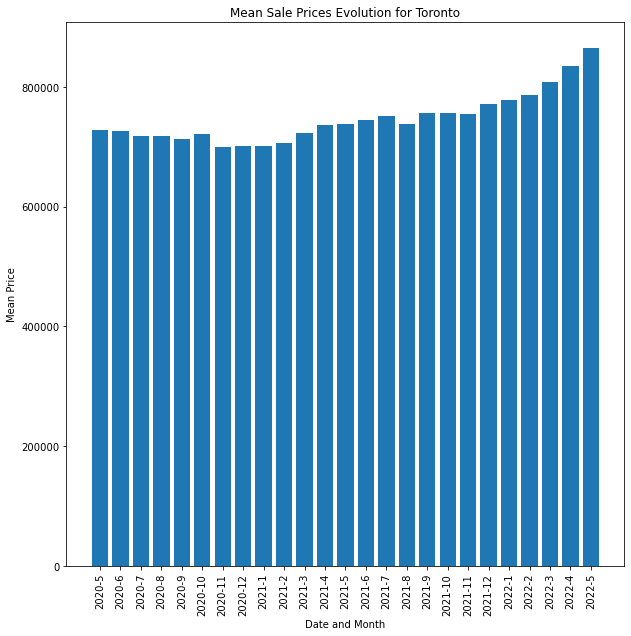

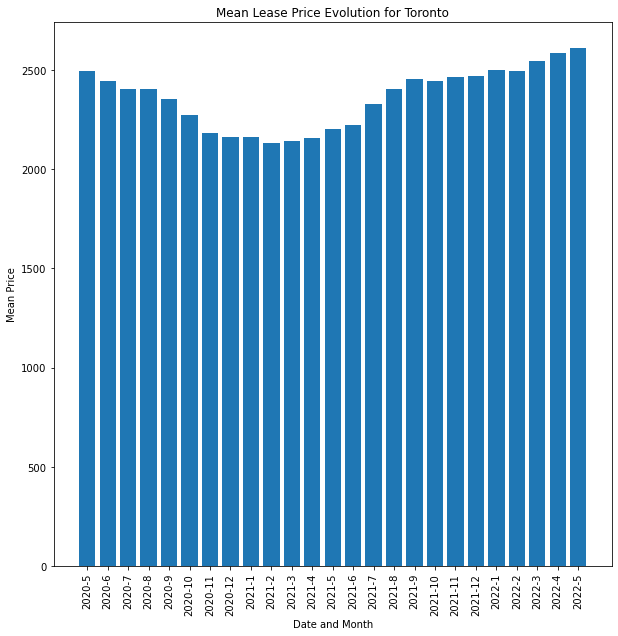

In [21]:
import matplotlib.pyplot as plt
import statistics

df_toronto_sale = df_sale[df_sale['Municipality']=='Toronto'].copy()

dates = list((df_toronto_sale['Input_year_month']).unique())
means = []
for x in dates:
    means.append(statistics.mean(df_toronto_sale.loc[df_toronto_sale['Input_year_month'] == x, 'Lp_dol']))

fig = plt.figure(figsize = (10,10))
plt.bar(dates, means)
plt.xlabel('Date and Month')
plt.ylabel('Mean Price')
plt.title('Mean Sale Prices Evolution for Toronto')
plt.xticks(rotation = 90)
plt.show()


df_toronto_lease = df_lease[df_lease['Municipality']=='Toronto'].copy()

dates = list((df_toronto_lease['Input_year_month']).unique())
means = []
for x in dates:
    means.append(statistics.mean(df_toronto_lease.loc[df_toronto_lease['Input_year_month'] == x, 'Lp_dol']))

fig = plt.figure(figsize = (10,10))
plt.bar(dates, means)
plt.xlabel('Date and Month')
plt.ylabel('Mean Price')
plt.title('Mean Lease Price Evolution for Toronto')
plt.xticks(rotation = 90)
plt.show()

In [22]:
indexes = df_sale[df_sale['Type_own1_out'].isin(['Locker','Other','Parking Space'])].index
df_sale.drop(indexes, axis=0, inplace=True)
df_sale.reset_index(inplace=True, drop=True)

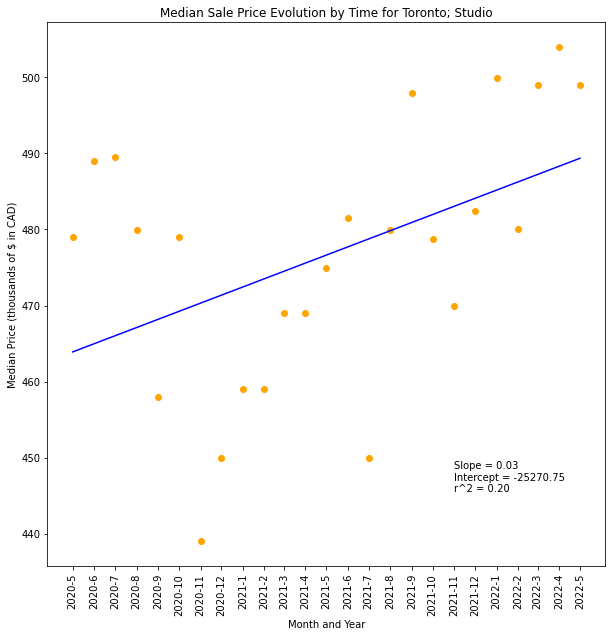

0.034892266442237474 -25270.754572161706


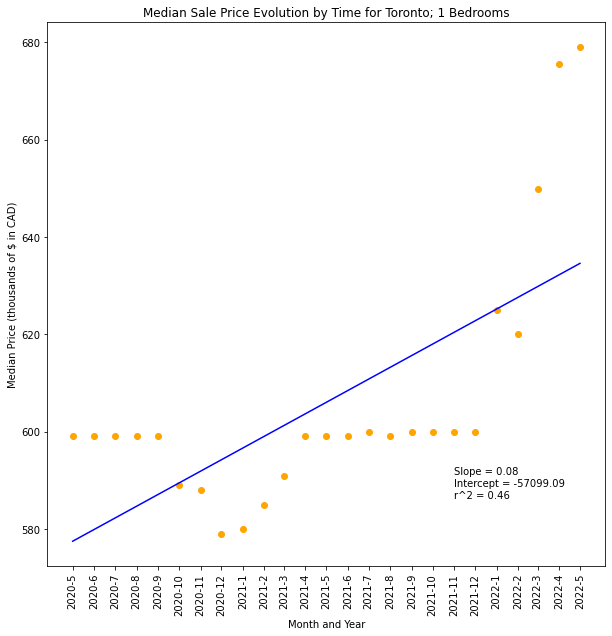

0.07820061500592924 -57099.08778815685


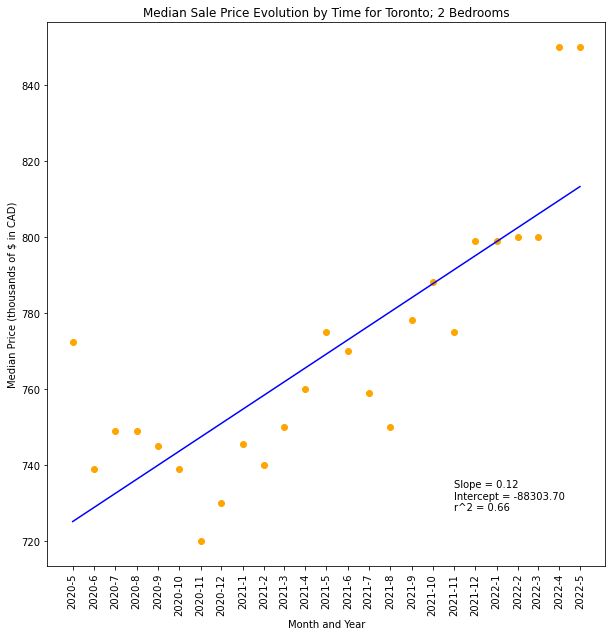

0.12070945888707535 -88303.70297276611


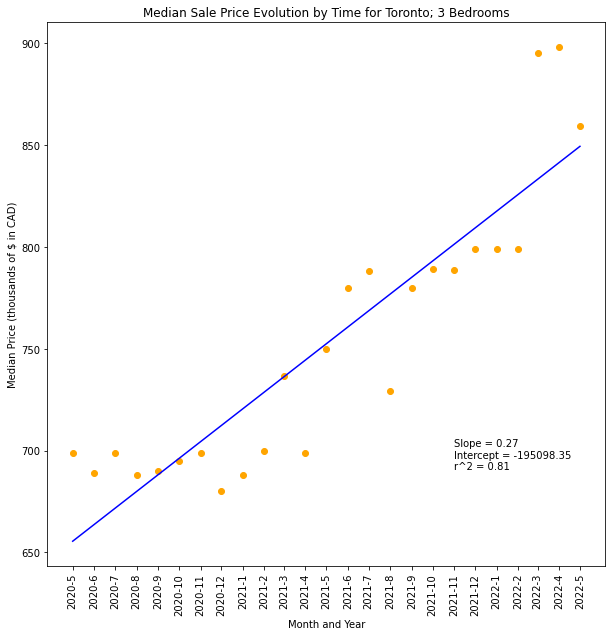

0.2654124353798599 -195098.35079003352


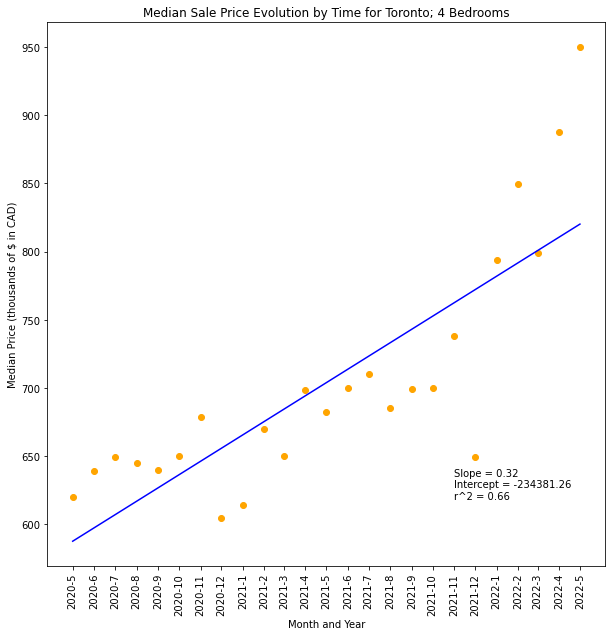

0.31858193449090705 -234381.2557309447


In [23]:
import scipy.stats as sp
import numpy as np
from datetime import datetime

for rooms in sorted(list(df_toronto_sale['Br'].unique())):
    
    df_toronto_sale_rooms = df_toronto_sale[df_toronto_sale['Br']==rooms].copy()
    if len(df_toronto_sale_rooms) < 100:
        continue
    
    date_min = list((df_toronto_sale_rooms['Input_year_month']).unique())[0]
    date_max = list((df_toronto_sale_rooms['Input_year_month']).unique())[-1]
    dates = []
    for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
        if year == int(date_min.split('-')[0]):
            x = int(date_min.split('-')[1])
        else:
            x = 1
        while x < 13:
            dates.append('{}-{}'.format(str(year),str(x)))
            if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
                break
            x+=1

    medians = []
    for x in dates:
        try:
            medians.append(statistics.median(df_toronto_sale_rooms.loc[df_toronto_sale_rooms['Input_year_month'] == x, 'Lp_dol']))
        except:
            medians.append(0)
    medians = [x/1000 for x in medians]

    o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
    o_dates = [x.toordinal() for x in o_dates]
    slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates,medians)
    xf = np.linspace(min(o_dates),max(o_dates),100)
    yf = (slope*xf)+intercept
    
    fig = plt.figure(figsize = (10,10))
    plt.scatter(o_dates, medians, color='orange')
    plt.plot(xf, yf, color='blue')
    plt.yticks(color='black')
    plt.xticks(o_dates, dates, rotation = 90, color='black')
    plt.xlabel('Month and Year', color='black')
    plt.ylabel('Median Price (thousands of $ in CAD)', color='black')
    if rooms != 0:
        plt.title('Median Sale Price Evolution by Time for Toronto; {} Bedrooms'.format(rooms), color='black')
    else:
        plt.title('Median Sale Price Evolution by Time for Toronto; Studio'.format(rooms), color='black')
    plt.text(sorted(o_dates)[-7],min(medians)+5,'Slope = {:0.2f}\nIntercept = {:0.2f}\nr^2 = {:0.2f}\n'.format(slope,intercept,r_value**2))
    plt.show()
    print(slope, intercept)

-1.0211197977586468 754861.6347778098 -0.9634657019336026
0.9070579707257982 -667794.5471440722 0.9015298778955051


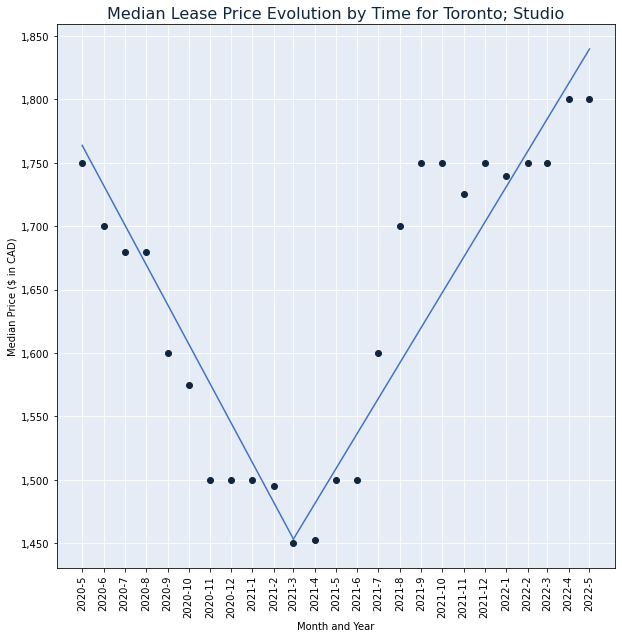

-1.3495422815998885 997497.6135055041 -0.9772295925762712
1.0133001019292966 -745839.7650359219 0.9440256609964945


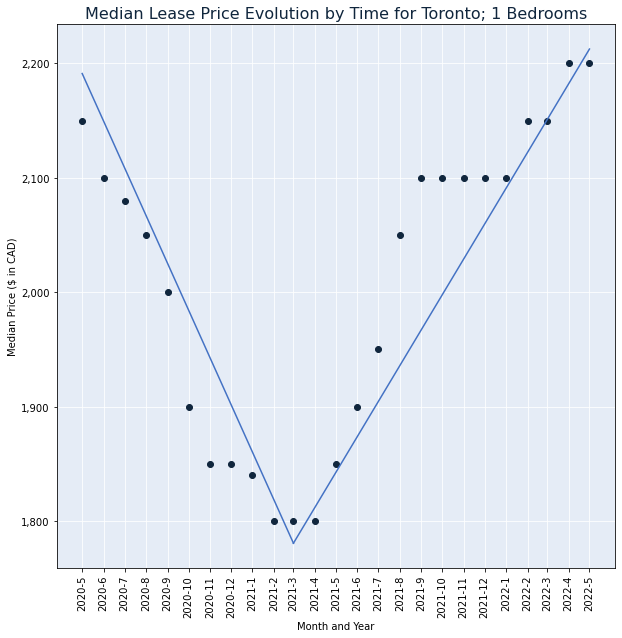

-1.414708509051619 1046212.5903203837 -0.9769097922682466
1.0089994216466227 -742013.2252185034 0.9689881289823341


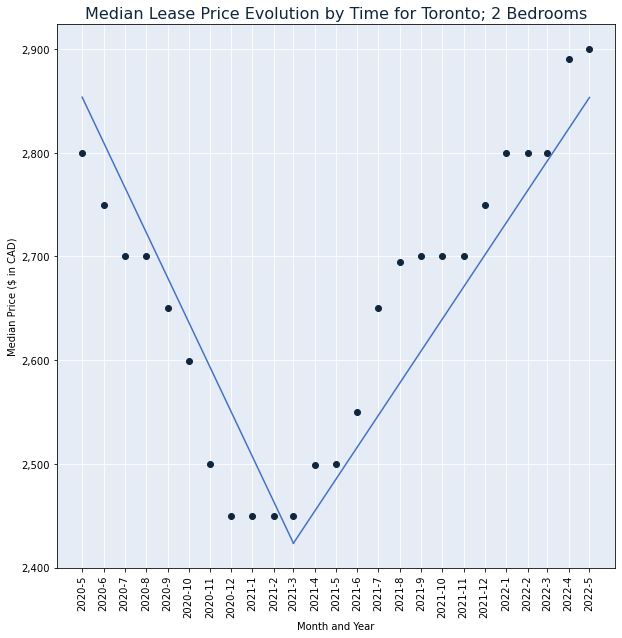

-2.3975254901910104 1771887.4539535162 -0.974216251554974
0.8705264973967346 -639231.9714034136 0.5859187937265977


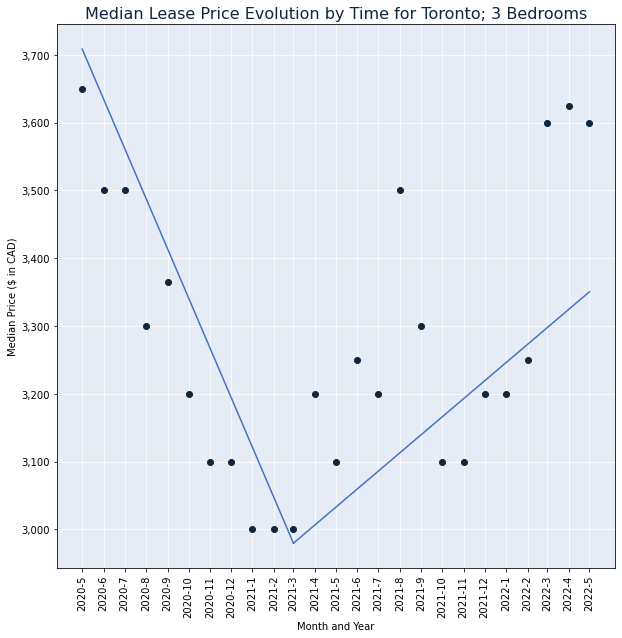

3121.0166492320714 3259.7440876220935
0.19003758683565075 -137040.4453710548 0.08125285473254985


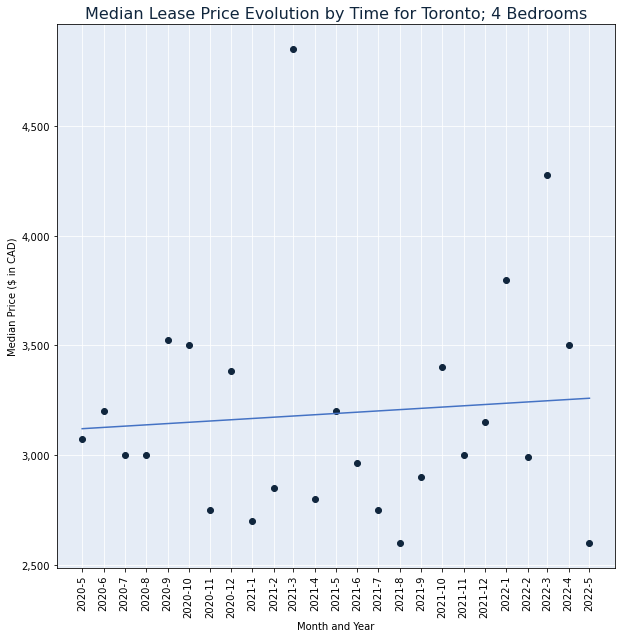

In [24]:
import matplotlib as mpl

for rooms in sorted(list(df_toronto_lease['Br'].unique())):
    
    df_toronto_lease_rooms = df_toronto_lease[df_toronto_lease['Br']==rooms].copy()
    if len(df_toronto_lease_rooms) < 100:
        continue
    
    date_min = list((df_toronto_lease_rooms['Input_year_month']).unique())[0]
    date_max = list((df_toronto_lease_rooms['Input_year_month']).unique())[-1]
    dates = []
    for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
        if year == int(date_min.split('-')[0]):
            x = int(date_min.split('-')[1])
        else:
            x = 1
        while x < 13:
            dates.append('{}-{}'.format(str(year),str(x)))
            if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
                break
            x+=1

    medians = []
    for x in dates:
        try:
            medians.append(statistics.median(df_toronto_lease_rooms.loc[df_toronto_lease_rooms['Input_year_month'] == x, 'Lp_dol']))
        except:
            medians.append(0)
    
    if rooms < 4:
        o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
        o_dates = [x.toordinal() for x in o_dates]
        slope1, intercept1, r_value1, p_value, std_err = sp.linregress(o_dates[0:10],medians[0:10])
        xf1 = np.linspace(min(o_dates),o_dates[10],100)
        yf1 = (slope1*xf1)+intercept1

        slope2, intercept2, r_value2, p_value, std_err = sp.linregress(o_dates[10:-1],medians[10:-1])
        xf2 = np.linspace(o_dates[10],max(o_dates),100)
        yf2 = (slope2*xf2)+intercept2

        print(slope1, intercept1, r_value1)
        print(slope2, intercept2, r_value2)

        fig, ax = plt.subplots(figsize=(10, 10))
        #fig = plt.figure(figsize = (10,10))

        #Accounting for height difference? This doesn't affect the slope of the regression line at all
        difference = yf2[0] - yf1[-1]
        yf1 = [x + difference/2 for x in yf1]
        yf2 = [x - difference/2for x in yf2]
        
        plt.plot(xf1, yf1, color='#4472C4')
        plt.plot(xf2, yf2, color='#4472C4')
        #plt.text(sorted(o_dates)[-7],min(medians)+5,'Slope1 = {:0.2f}\nIntercept1 = {:0.2f}\nr1^2 = {:0.2f}\n\nSlope2 = {:0.2f}\nIntercept2 = {:0.2f}\nr2^2 = {:0.2f}\n'.format(slope1,intercept1,r_value1**2,slope2,intercept2,r_value2**2))
        
        
    else:
        o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
        o_dates = [x.toordinal() for x in o_dates]
        slope1, intercept1, r_value1, p_value, std_err = sp.linregress(o_dates,medians)
        xf1 = np.linspace(min(o_dates),max(o_dates),100)
        yf1 = (slope1*xf1)+intercept1

        print(yf1[0],yf1[-1])
        print(slope1, intercept1, r_value1)

        fig, ax = plt.subplots(figsize=(10, 10))
        #fig = plt.figure(figsize = (10,10))
        plt.plot(xf1, yf1, color='#4472C4')
        #plt.text(sorted(o_dates)[-7],min(medians)+5,'Slope = {:0.2f}\nIntercept = {:0.2f}\nr^2 = {:0.2f}\n'.format(slope1,intercept1,r_value1**2))
        
    ax.set_axisbelow(True)
    ax.set_facecolor('#e5ecf6')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.grid(axis='y', color='white')
    plt.grid(axis='x', color='white')
    plt.scatter(o_dates, medians, color='#10263d')
    plt.yticks(color='black')
    plt.xticks(o_dates, dates, rotation = 90, color='black')
    plt.xlabel('Month and Year', color='black')
    plt.ylabel('Median Price ($ in CAD)', color='black')
    if rooms != 0:
        plt.title('Median Lease Price Evolution by Time for Toronto; {} Bedrooms'.format(rooms), color='#10263d', fontsize='16')
    else:
        plt.title('Median Lease Price Evolution by Time for Toronto; Studio'.format(rooms), color='#10263d', fontsize='16')
    plt.show()

([737546, 737577, 737607, 737638, 737669, 737699, 737730, 737760, 737791, 737822], [479000, 489000.0, 489500.0, 479900, 458000, 479000, 439000.0, 449900, 459000, 459000.0])
-136.57714781273546 101218893.04937516 -0.7287920090261998
77.27618348893955 -56552421.70633424 0.6577127414204671
439000.0


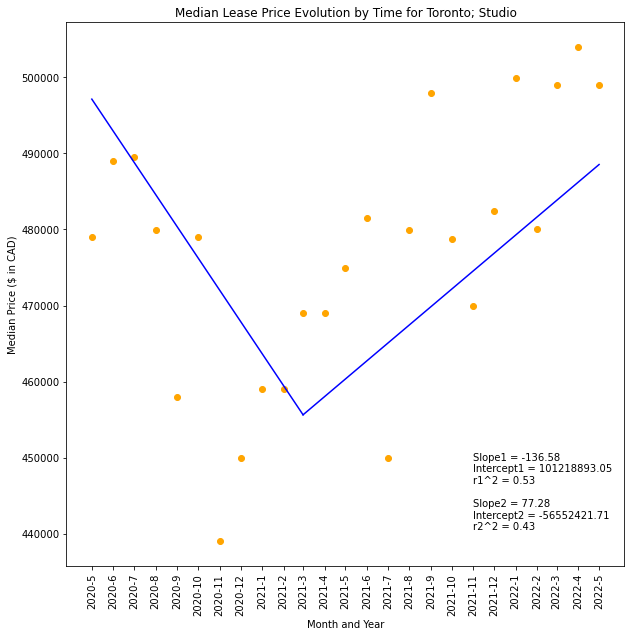

([737546, 737577, 737607, 737638, 737669, 737699, 737730, 737760, 737791, 737822], [599150.0, 599000.0, 599000.0, 599000.0, 599000.0, 589000.0, 588000, 579000, 579900.0, 584900])
-80.04876384367138 59642279.3023785 -0.882708559035325
146.03026479671368 -107166235.3207123 0.7738118961227829
579000


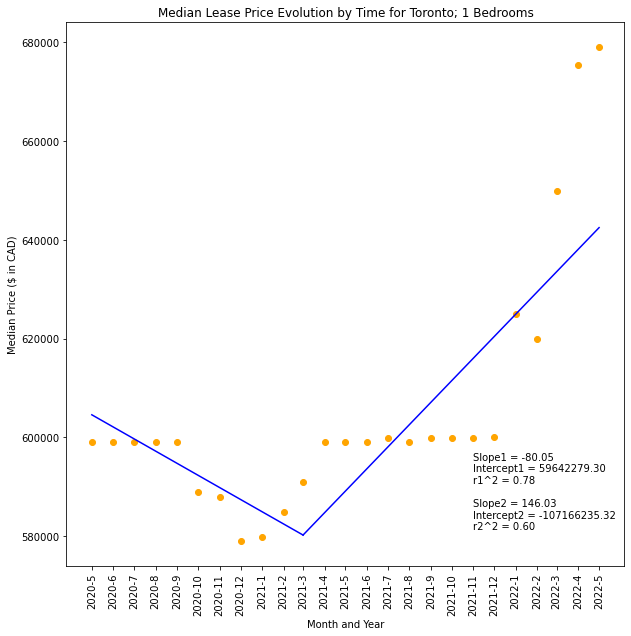

([737546, 737577, 737607, 737638, 737669, 737699, 737730, 737760, 737791, 737822], [772400.0, 739000, 749000.0, 749000, 745000, 739000.0, 719900, 729900, 745450.0, 739999.5])
-86.1729888630257 64311291.44913337 -0.5826579625742404
176.63904671967623 -129585898.06417935 0.8472208314815023
719900


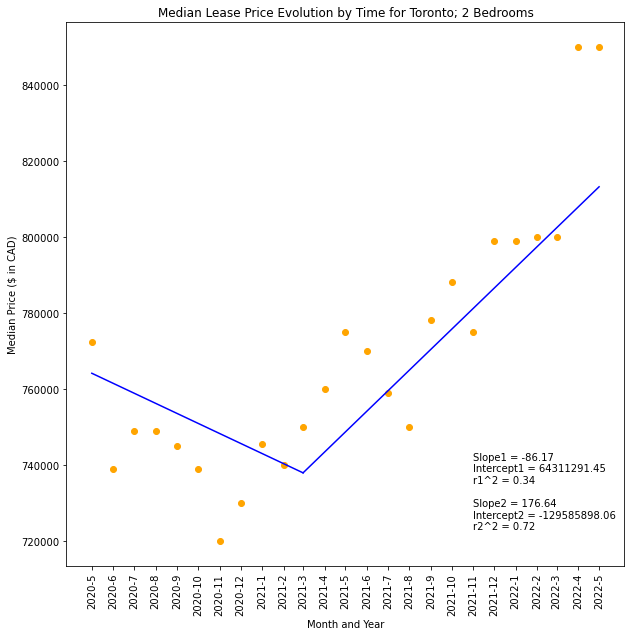

([737546, 737577, 737607, 737638, 737669, 737699, 737730, 737760, 737791, 737822], [699000.0, 689000, 699000.0, 688000.0, 689800, 695000, 699000.0, 680000, 687950.0, 699844.0])
-11.143676920472158 8913170.451033892 -0.15432729918350174
364.7059935709254 -268382935.02545878 0.8434829293315812
680000


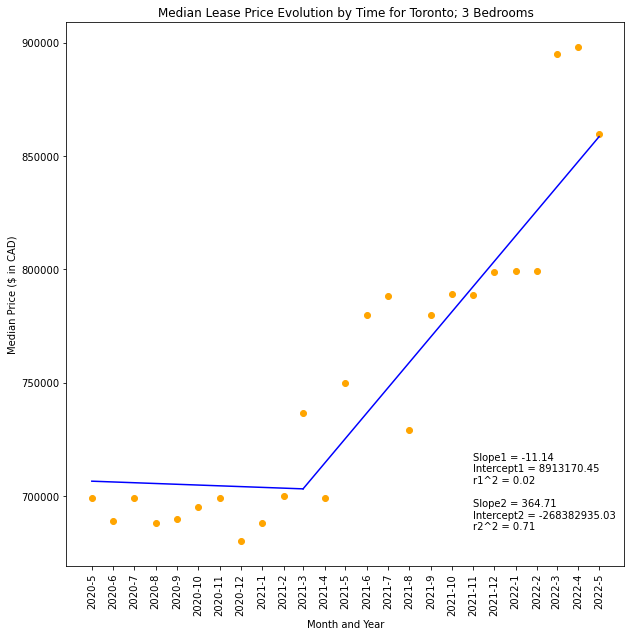

([737546, 737577, 737607, 737638, 737669, 737699, 737730, 737760, 737791, 737822], [619900.0, 639000, 649000.0, 644950.0, 639900, 649900, 679000, 604950.0, 614499.5, 670000])
34.286635889310084 -24651589.33070623 0.13630099454253
448.5399139796418 -330312700.20850563 0.7814924384165002
604950.0


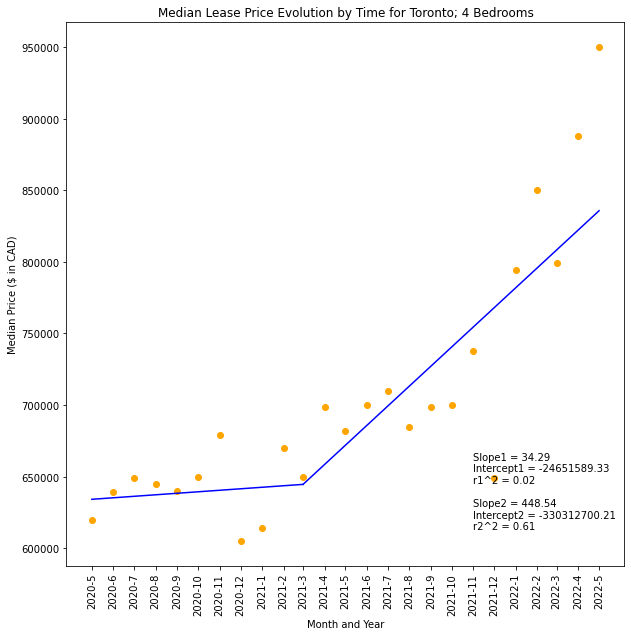

In [25]:
for rooms in sorted(list(df_toronto_sale['Br'].unique())):
    
    df_toronto_sale_rooms = df_toronto_sale[df_toronto_sale['Br']==rooms].copy()
    if len(df_toronto_sale_rooms) < 100:
        continue
    
    date_min = list((df_toronto_sale_rooms['Input_year_month']).unique())[0]
    date_max = list((df_toronto_sale_rooms['Input_year_month']).unique())[-1]
    dates = []
    for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
        if year == int(date_min.split('-')[0]):
            x = int(date_min.split('-')[1])
        else:
            x = 1
        while x < 13:
            dates.append('{}-{}'.format(str(year),str(x)))
            if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
                break
            x+=1

    medians = []
    for x in dates:
        try:
            medians.append(statistics.median(df_toronto_sale_rooms.loc[df_toronto_sale_rooms['Input_year_month'] == x, 'Lp_dol']))
        except:
            medians.append(0)
    
    o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
    o_dates = [x.toordinal() for x in o_dates]
    slope1, intercept1, r_value1, p_value, std_err = sp.linregress(o_dates[0:10],medians[0:10])
    xf1 = np.linspace(min(o_dates),o_dates[10],100)
    yf1 = (slope1*xf1)+intercept1
    print((o_dates[0:10],medians[0:10]))

    slope2, intercept2, r_value2, p_value, std_err = sp.linregress(o_dates[10:-1],medians[10:-1])
    xf2 = np.linspace(o_dates[10],max(o_dates),100)
    yf2 = (slope2*xf2)+intercept2

    print(slope1, intercept1, r_value1)
    print(slope2, intercept2, r_value2)

    fig = plt.figure(figsize = (10,10))

    #Accounting for height difference? This doesn't affect the slope of the regression line at all
    difference = yf2[0] - yf1[-1]
    yf1 = [x + difference/2 for x in yf1]
    yf2 = [x - difference/2for x in yf2]

    plt.plot(xf1, yf1, color='blue')
    plt.plot(xf2, yf2, color='blue')
    plt.text(sorted(o_dates)[-7],min(medians)+5,'Slope1 = {:0.2f}\nIntercept1 = {:0.2f}\nr1^2 = {:0.2f}\n\nSlope2 = {:0.2f}\nIntercept2 = {:0.2f}\nr2^2 = {:0.2f}\n'.format(slope1,intercept1,r_value1**2,slope2,intercept2,r_value2**2))
        
    plt.scatter(o_dates, medians, color='orange')
    plt.yticks(color='black')
    plt.xticks(o_dates, dates, rotation = 90, color='black')
    plt.xlabel('Month and Year', color='black')
    plt.ylabel('Median Price ($ in CAD)', color='black')
    if rooms != 0:
        plt.title('Median Lease Price Evolution by Time for Toronto; {} Bedrooms'.format(rooms), color='black')
    else:
        plt.title('Median Lease Price Evolution by Time for Toronto; Studio'.format(rooms), color='black')
    print(min(medians))
    plt.show()


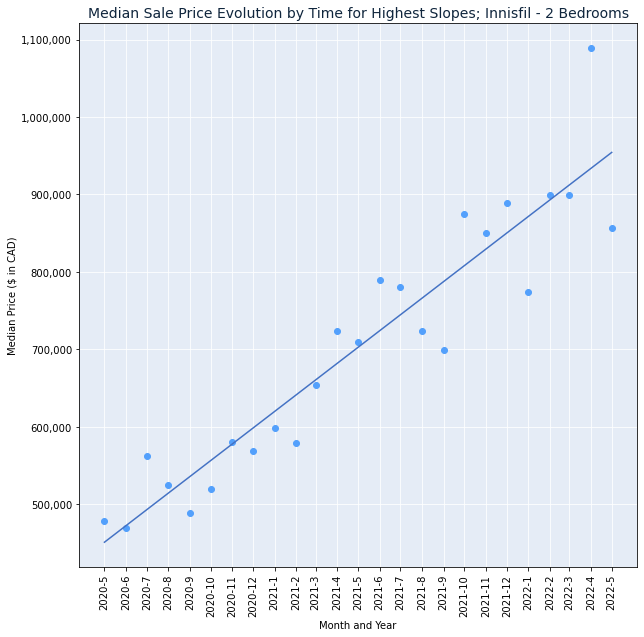

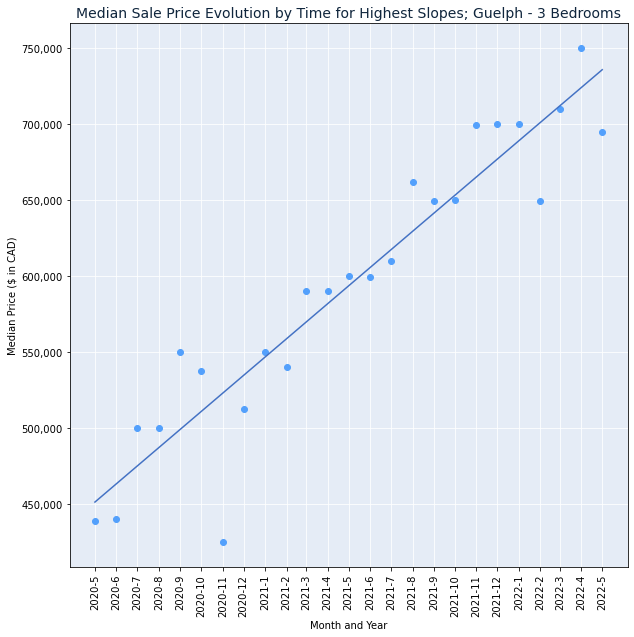

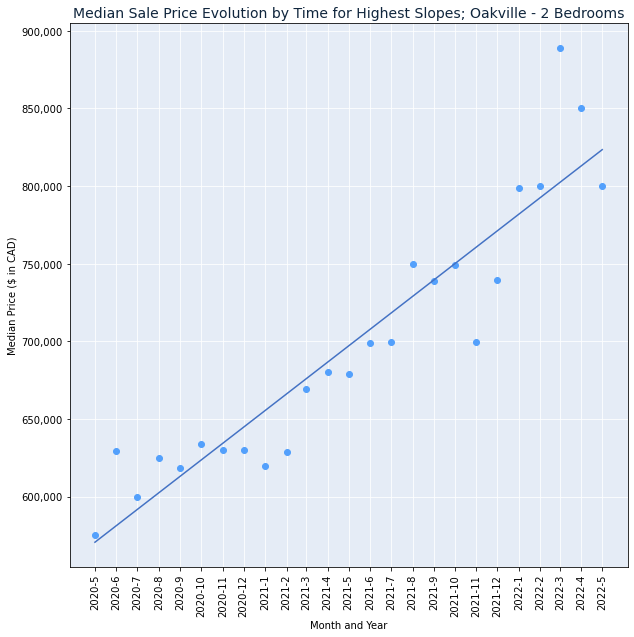

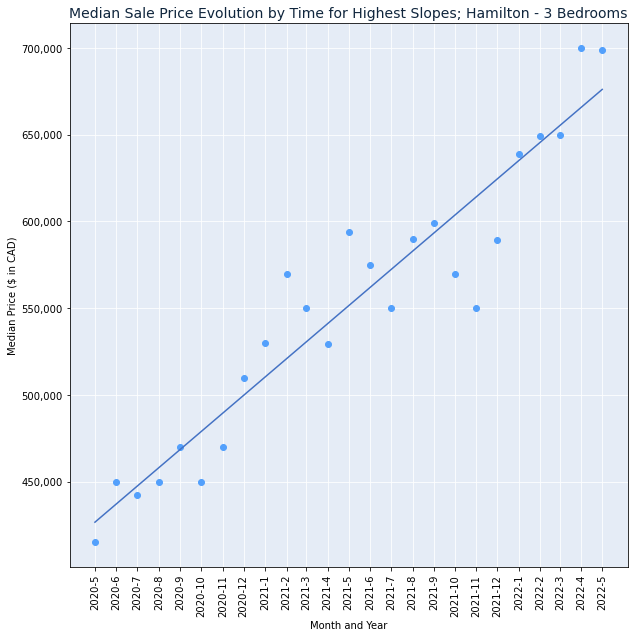

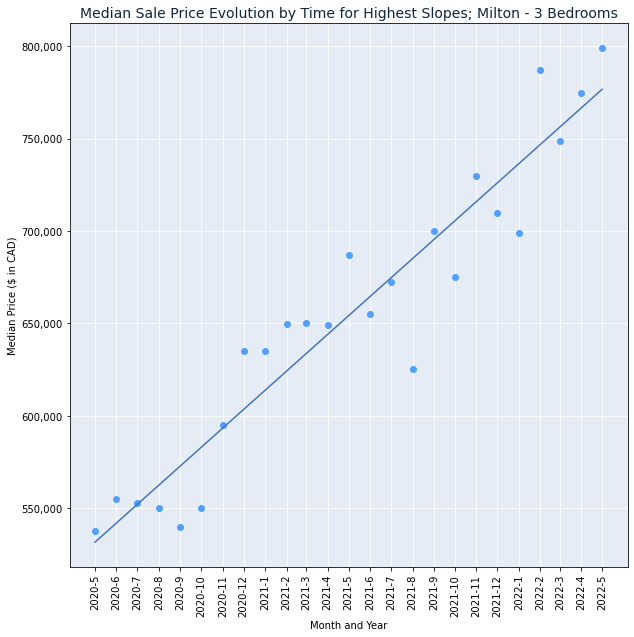

In [26]:
slopes, lines = [], []
for loc in df_sale['Municipality'].unique():
    
    df_sale_loc = df_sale[df_sale['Municipality']==loc].copy()
    if len(df_sale_loc)<100:
        continue
        
    for rooms in sorted(df_sale_loc['Br'].unique()):
        
        df_sale_loc_rooms = df_sale_loc[df_sale_loc['Br']==rooms].copy()
        if len(df_sale_loc_rooms)<100:
            continue
            
        date_min = list((df_sale_loc_rooms['Input_year_month']).unique())[0]
        date_max = list((df_sale_loc_rooms['Input_year_month']).unique())[-1]
        dates = []
        for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
            if year == int(date_min.split('-')[0]):
                x = int(date_min.split('-')[1])
            else:
                x = 1
            while x < 13:
                dates.append('{}-{}'.format(str(year),str(x)))
                if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
                    break
                x+=1

        medians = []
        for x in dates:
            try:
                medians.append(statistics.median(df_sale_loc_rooms.loc[df_sale_loc_rooms['Input_year_month'] == x, 'Lp_dol']))
            except:
                medians.append(0)
                
        o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
        o_dates = [x.toordinal() for x in o_dates]
        slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates,medians)
        slopes.append(slope)
        lines.append('{}; {}; {:0.2f}'.format(loc, rooms, slope))
        
        #print('{}; {}; {:0.2f}'.format(loc, rooms, slope))
        #fig = plt.figure(figsize = (10,10))
        #plt.scatter(o_dates, medians, color='orange')
        #plt.show()
        
high_slopes = [str('{:0.2f}'.format(x)) for x in sorted(slopes)]#[-5:]]
lines = [x for x in lines if any(substring in x for substring in high_slopes)]
lines = sorted(lines, key=lambda x: float(x.split('; ')[-1]))
lines = [x.split('; ') for x in lines]
lines.reverse()

count = 0
for line in lines:
    
    df_sale_loc = df_sale[df_sale['Municipality']==line[0]].copy()
    df_sale_loc_rooms = df_sale_loc[df_sale_loc['Br']==int(line[1])].copy()
    
    date_min = list((df_sale_loc_rooms['Input_year_month']).unique())[0]
    date_max = list((df_sale_loc_rooms['Input_year_month']).unique())[-1]
    dates = []
    for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
        if year == int(date_min.split('-')[0]):
            x = int(date_min.split('-')[1])
        else:
            x = 1
        while x < 13:
            dates.append('{}-{}'.format(str(year),str(x)))
            if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
                break
            x+=1

    medians = []
    for x in dates:
        try:
            medians.append(statistics.median(df_sale_loc_rooms.loc[df_sale_loc_rooms['Input_year_month'] == x, 'Lp_dol']))
        except:
            medians.append(0)

    o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
    o_dates = [x.toordinal() for x in o_dates]
    slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates,medians)
    xf = np.linspace(min(o_dates),max(o_dates),100)
    yf = (slope*xf)+intercept
    if r_value*r_value < 0.85:
        continue

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axisbelow(True)
    ax.set_facecolor('#e5ecf6')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.scatter(o_dates, medians, color='#53a0fc')
    plt.plot(xf, yf, color='#4472C4')
    plt.yticks(color='black')
    plt.xticks(o_dates, dates, rotation = 90, color='black')
    plt.xlabel('Month and Year', color='black')
    plt.ylabel('Median Price ($ in CAD)', color='black')
    plt.title('Median Sale Price Evolution by Time for Highest Slopes; {} - {} Bedrooms'.format(line[0],line[1]), color='#10263d', fontsize='14')
    plt.grid(axis='y', color='white')
    plt.grid(axis='x', color='white')
    plt.show()
    
    count += 1
    if count == 5:
        break

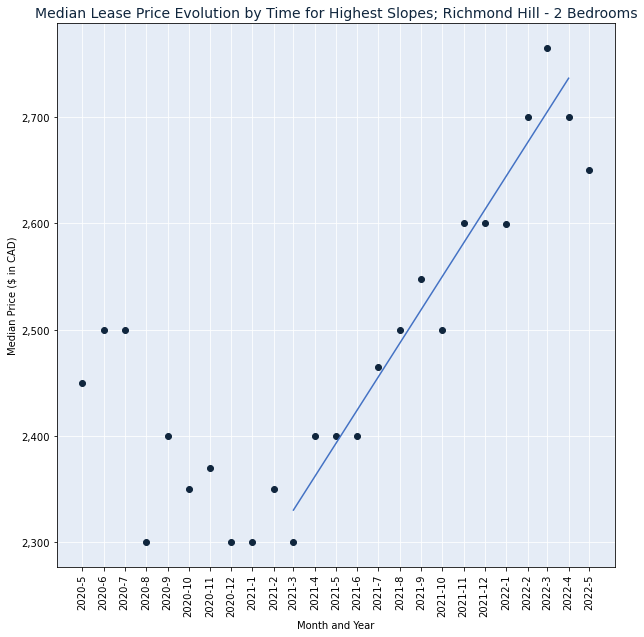

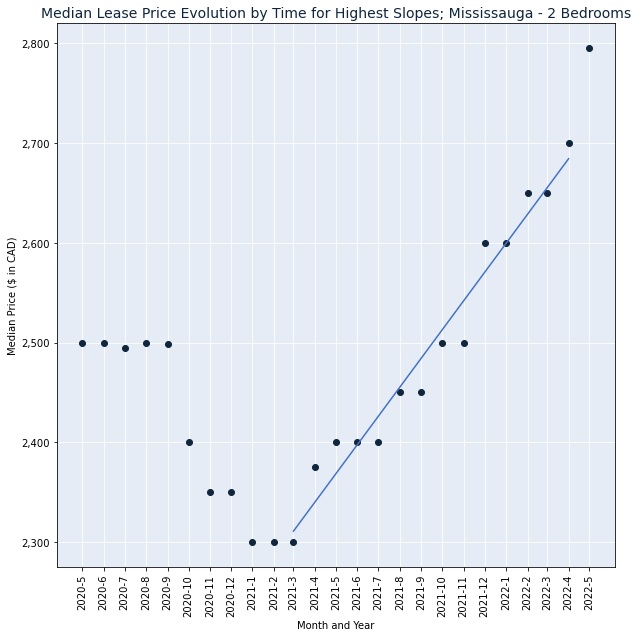

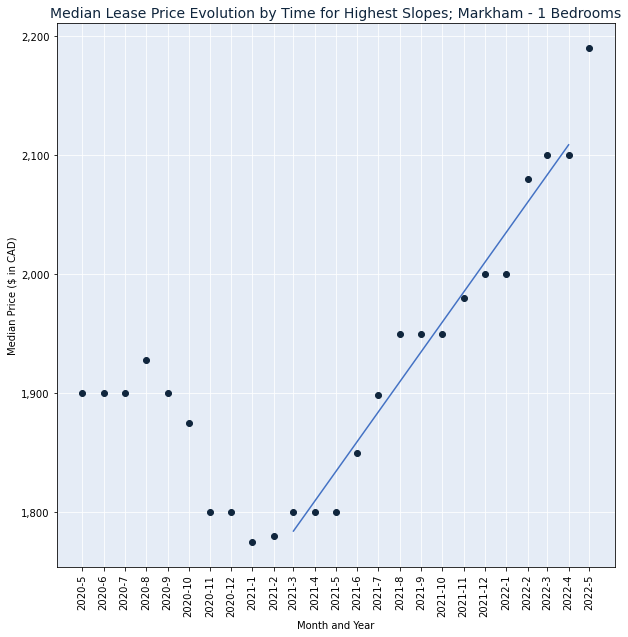

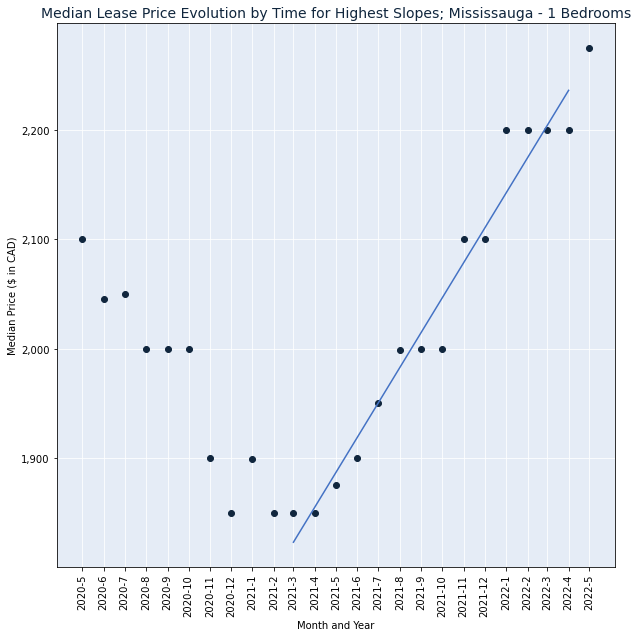

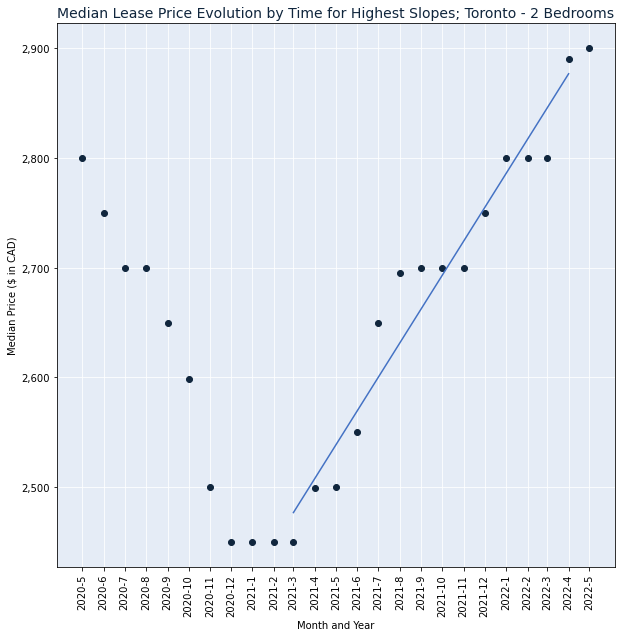

In [27]:
slopes, lines = [], []
for loc in df_lease['Municipality'].unique():
    
    df_lease_loc = df_lease[df_lease['Municipality']==loc].copy()
    if len(df_lease_loc)<100:
        continue
        
    for rooms in sorted(df_lease_loc['Br'].unique()):
        
        df_lease_loc_rooms = df_lease_loc[df_lease_loc['Br']==rooms].copy()
        if len(df_lease_loc_rooms)<100:
            continue
            
        date_min = list((df_lease_loc_rooms['Input_year_month']).unique())[0]
        date_max = list((df_lease_loc_rooms['Input_year_month']).unique())[-1]
        dates = []
        for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
            if year == int(date_min.split('-')[0]):
                x = int(date_min.split('-')[1])
            else:
                x = 1
            while x < 13:
                dates.append('{}-{}'.format(str(year),str(x)))
                if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
                    break
                x+=1

        medians = []
        for x in dates:
            try:
                medians.append(statistics.median(df_lease_loc_rooms.loc[df_lease_loc_rooms['Input_year_month'] == x, 'Lp_dol']))
            except:
                medians.append(0)
                
        o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
        o_dates = [x.toordinal() for x in o_dates]
        slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates,medians)
        slopes.append(slope)
        lines.append('{}; {}; {:0.2f}'.format(loc, rooms, slope))
        
        #print('{}; {}; {:0.2f}'.format(loc, rooms, slope))
        #fig = plt.figure(figsize = (10,10))
        #plt.scatter(o_dates, medians, color='orange')
        #plt.show()

high_slopes = [str('{:0.2f}'.format(x)) for x in sorted(slopes)]#[-5:]]
lines = [x for x in lines if any(substring in x for substring in high_slopes)]
lines = sorted(lines, key=lambda x: float(x.split('; ')[-1]))
lines = [x.split('; ') for x in lines]
lines.reverse()

count = 0
for line in lines:
    
    df_lease_loc = df_lease[df_lease['Municipality']==line[0]].copy()
    df_lease_loc_rooms = df_lease_loc[df_lease_loc['Br']==int(line[1])].copy()
    
    date_min = list((df_lease_loc_rooms['Input_year_month']).unique())[0]
    date_max = list((df_lease_loc_rooms['Input_year_month']).unique())[-1]
    dates = []
    for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
        if year == int(date_min.split('-')[0]):
            x = int(date_min.split('-')[1])
        else:
            x = 1
        while x < 13:
            dates.append('{}-{}'.format(str(year),str(x)))
            if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
                break
            x+=1

    medians = []
    for x in dates:
        try:
            medians.append(statistics.median(df_lease_loc_rooms.loc[df_lease_loc_rooms['Input_year_month'] == x, 'Lp_dol']))
        except:
            medians.append(0)

    o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
    o_dates = [x.toordinal() for x in o_dates]
    slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates[10:-1],medians[10:-1])
    xf = np.linspace(min(o_dates[10:-1]),max(o_dates[10:-1]),100)
    yf = (slope*xf)+intercept
    if r_value*r_value < 0.85:
        continue

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axisbelow(True)
    ax.set_facecolor('#e5ecf6')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.scatter(o_dates, medians, color='#10263d')
    plt.plot(xf, yf, color='#4472C4')
    plt.yticks(color='black')
    plt.xticks(o_dates, dates, rotation = 90, color='black')
    plt.xlabel('Month and Year', color='black')
    plt.ylabel('Median Price ($ in CAD)', color='black')
    plt.title('Median Lease Price Evolution by Time for Highest Slopes; {} - {} Bedrooms'.format(line[0],line[1]), color='#10263d', fontsize=14)
    plt.grid(axis='y', color='white')
    plt.grid(axis='x', color='white')
    plt.show()
    
    count += 1
    if count == 5:
        break

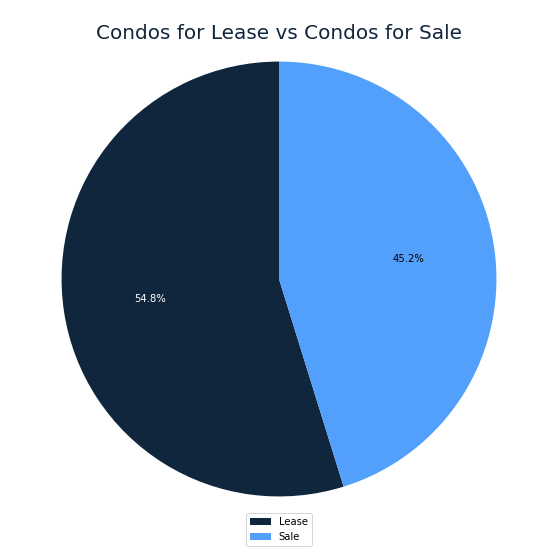

313442


In [28]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

df = pd.concat([df_sale,df_lease])

plt.figure(figsize=(10,10))
data = df.groupby('S_r')['S_r'].count()
_, _, autotexts = plt.pie(data, startangle=90, colors=['#10263d','#53a0fc'], autopct='%1.1f%%')
autotexts[0].set_color('white')
autotexts[1].set_color('black')
plt.legend(labels = ['Lease','Sale'], loc='lower center')
plt.title('Condos for Lease vs Condos for Sale', fontsize='20', y=0.93, color='#10263d')
plt.show()

print(len(df))

<ipython-input-29-6252f597dcc3>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sale_count.loc[8] = None
<ipython-input-29-6252f597dcc3>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lease_count.loc[7] = None


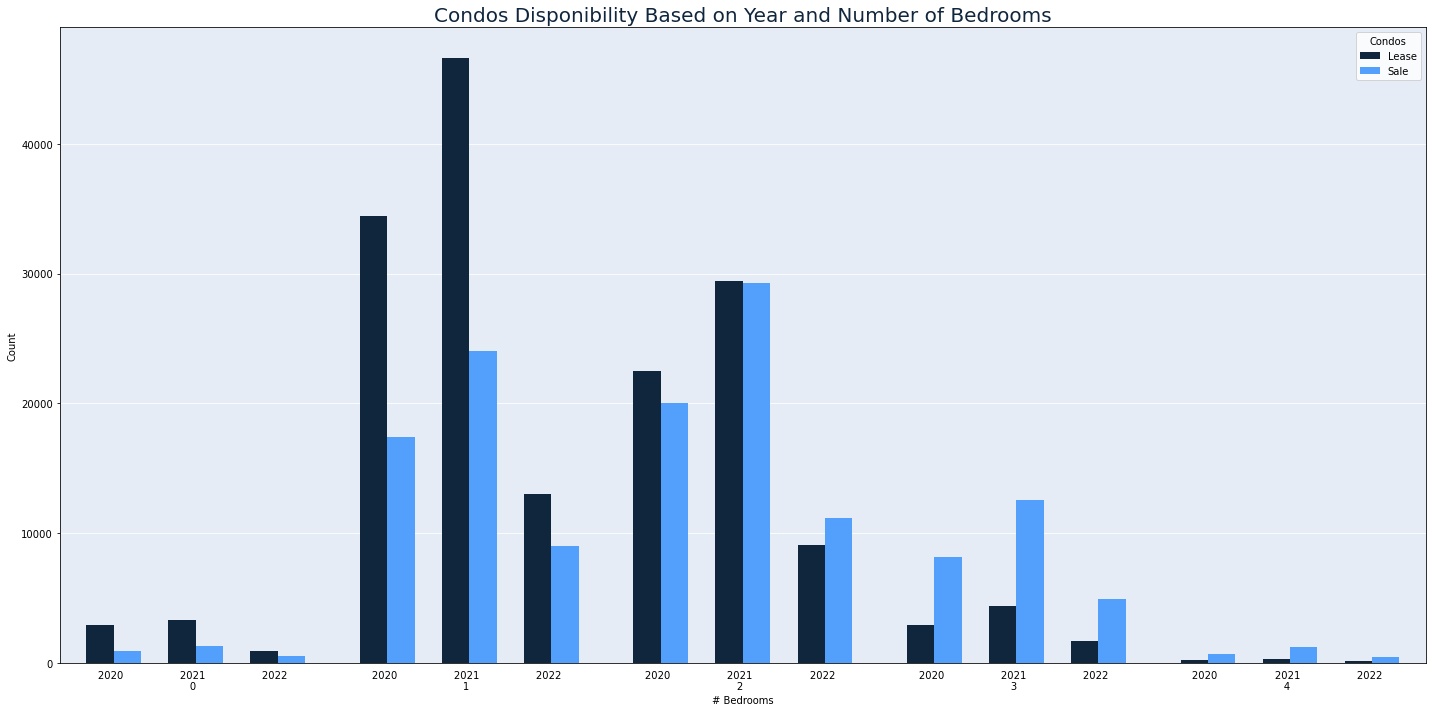

In [29]:
#plt.figure(figsize=(15,10))
sale_count = pd.DataFrame()
for year in ['2020','2021','2022']:
    data_sale = df_sale[df_sale['Input_year_month'].str.contains(year)].groupby('Br')['Br'].count()
    data_sale = data_sale.rename(year)
    sale_count = pd.concat([sale_count, data_sale], axis=1)
sale_count.loc[8] = None
sale_count = sale_count.fillna(0).sort_index()
sale_count = sale_count[0:5]

lease_count = pd.DataFrame()
for year in ['2020','2021','2022']:
    data_lease = df_lease[df_lease['Input_year_month'].str.contains(year)].groupby('Br')['Br'].count()
    data_lease = data_lease.rename(year)
    lease_count = pd.concat([lease_count, data_lease], axis=1)
lease_count.loc[7] = None
lease_count = lease_count.fillna(0).sort_index()
lease_count = lease_count[0:5]

x_axis = np.arange(len([0,1,2,3,4]))
width = 0.1
x = np.arange(1, 6)

fig, ax = plt.subplots(figsize=(20, 10))

tick_labels_1 = ['       2020'] * len(x)
tick_labels_2 = ['       2021'] * len(x)
tick_labels_3 = ['       2022'] * len(x)
shift1_sale = sale_count['2020'].tolist()
shift2_sale = sale_count['2021'].tolist()
shift3_sale = sale_count['2022'].tolist()
shift1_lease = lease_count['2020'].tolist()
shift2_lease = lease_count['2021'].tolist()
shift3_lease = lease_count['2022'].tolist()

all_x = np.concatenate([x - 0.4, x - 0.1, x + 0.2])
ax.bar(all_x, np.concatenate([shift1_lease, shift2_lease, shift3_lease]), width,
      tick_label=tick_labels_1 + tick_labels_2 + tick_labels_3,
      color='#10263d', label='Lease')
all_x = np.concatenate([x - 0.3, x - 0.0, x + 0.3])
ax.bar(all_x, np.concatenate([shift1_sale, shift2_sale, shift3_sale]), width,
       color='#53a0fc', label='Sale')

ax.margins(x=0.02)
ax.set_xticks(x - 0.1001, minor=True)
ax.set_xticklabels(['       ' + str(x) for x in x_axis], minor=True)
ax.tick_params(axis='x', which='minor', length=0, pad=18)
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')

plt.tick_params(bottom=False)
plt.title('Condos Disponibility Based on Year and Number of Bedrooms', color='#10263d', fontsize='20')
plt.xlabel('# Bedrooms')
plt.ylabel('Count')
plt.grid(axis='y', color='white')
plt.legend(title='Condos')

plt.tight_layout()
plt.show()

474.99999999999994


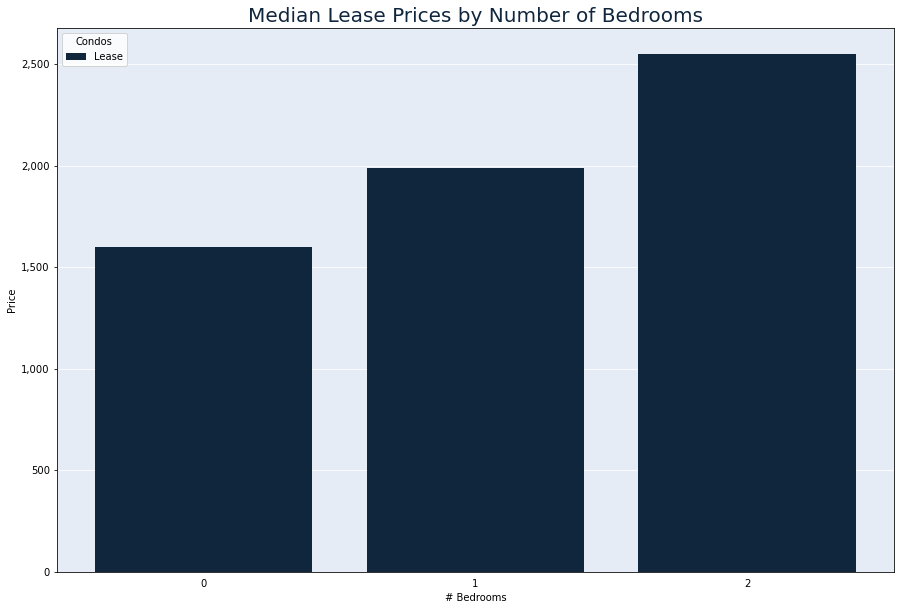

117000.0


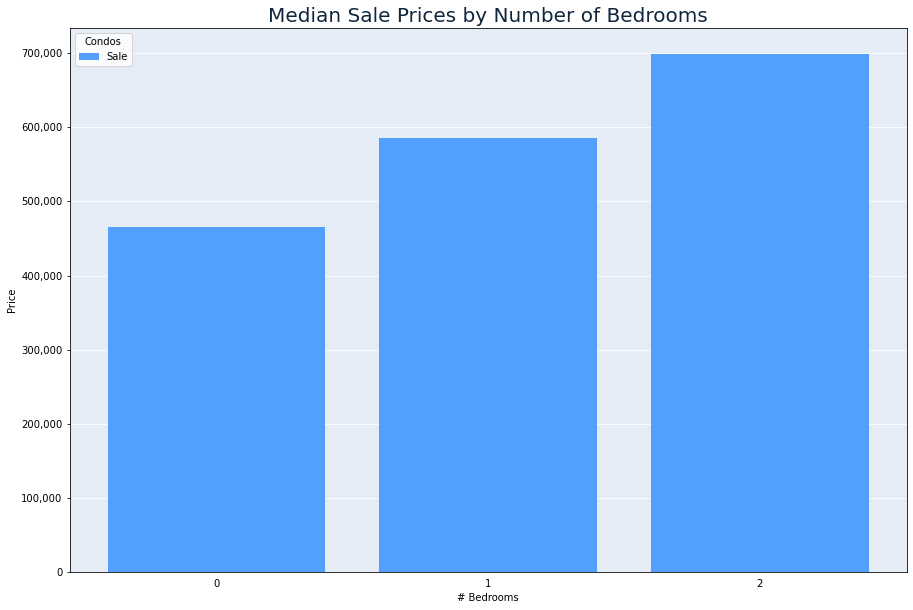

In [30]:
import matplotlib as mpl

#Lease
rooms = [0,1,2]
medians = []
for x in rooms:
    medians.append(statistics.median(df_lease.loc[df_lease['Br'] == x, 'Lp_dol']))
slope, intercept, r_value, p_value, std_err = sp.linregress(rooms,medians)   
print(slope)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.bar([str(x) for x in rooms], medians, color='#10263d')
plt.tick_params(bottom=False)
plt.title('Median Lease Prices by Number of Bedrooms', color='#10263d', fontsize='20')
plt.xlabel('# Bedrooms')
plt.ylabel('Price')
plt.grid(axis='y', color='white')
plt.legend(['Lease'], title='Condos')
plt.show()

#Sale
medians = []
for x in rooms:
    medians.append(statistics.median(df_sale.loc[df_sale['Br'] == x, 'Lp_dol']))
slope, intercept, r_value, p_value, std_err = sp.linregress(rooms,medians)
print(slope)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.bar([str(x) for x in rooms], medians, color='#53a0fc')
plt.tick_params(bottom=False)
plt.title('Median Sale Prices by Number of Bedrooms', color='#10263d', fontsize='20')
plt.xlabel('# Bedrooms')
plt.ylabel('Price')
plt.grid(axis='y', color='white')
plt.legend(['Sale'], title='Condos')
plt.show()

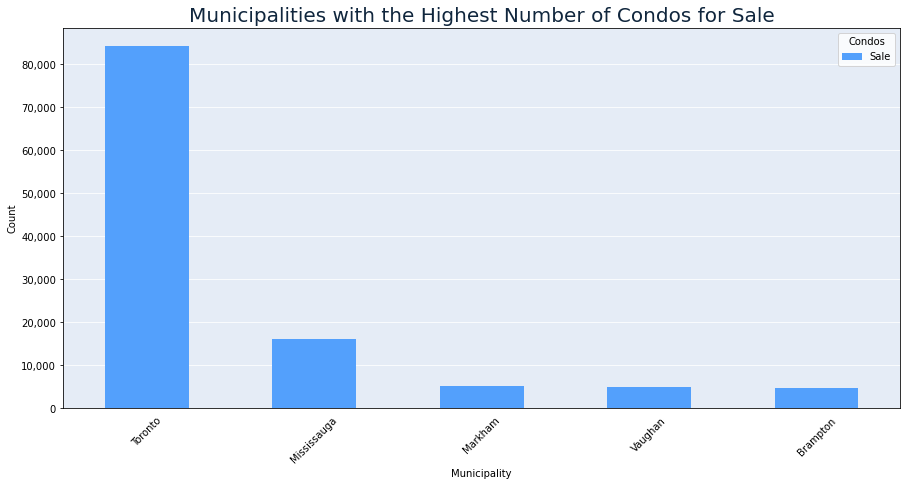

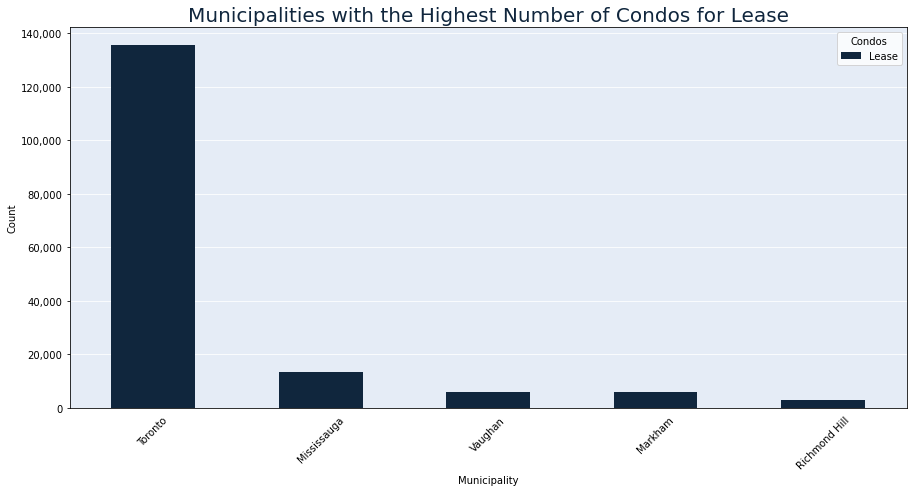

In [31]:
#Sale
data = df_sale.groupby('Municipality')['Municipality'].count().nlargest()

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

data.plot.bar(color='#53a0fc')
#plt.bar([str(x) for x in municipality], medians, color='#53a0fc')
plt.tick_params(bottom=False)
plt.title('Municipalities with the Highest Number of Condos for Sale', color='#10263d', fontsize='20')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(axis='y', color='white')
plt.legend(['Sale'], title='Condos')
plt.show()


#Lease
data = df_lease.groupby('Municipality')['Municipality'].count().nlargest()

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

data.plot.bar(color='#10263d')
#plt.bar([str(x) for x in municipality], medians, color='#53a0fc')
plt.tick_params(bottom=False)
plt.title('Municipalities with the Highest Number of Condos for Lease', color='#10263d', fontsize='20')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(axis='y', color='white')
plt.legend(['Lease'], title='Condos')
plt.show()

In [32]:
import folium
import json

with open(r'C:\Users\imffb\project\EDA\all_geo.geojson', encoding='utf8') as data:
    t_geo = json.load(data)

#Sale
data = df_sale.groupby('Municipality')['Municipality'].count().nlargest().index.tolist()
data = pd.DataFrame(columns=['Municipality'], data=data)

fig = px.choropleth_mapbox(data, geojson=t_geo, color="Municipality",
                           locations="Municipality", featureidkey="properties.name",
                           center={"lat": 43.6532, "lon": -79.3832},
                           mapbox_style="carto-positron", zoom=8)
fig.update_layout(width=800,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


#Lease
data = df_lease.groupby('Municipality')['Municipality'].count().nlargest().index.tolist()
data = pd.DataFrame(columns=['Municipality'], data=data)

fig = px.choropleth_mapbox(data, geojson=t_geo, color="Municipality",
                           locations="Municipality", featureidkey="properties.name",
                           center={"lat": 43.6532, "lon": -79.3832},
                           mapbox_style="carto-positron", zoom=8)
fig.update_layout(width=800,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


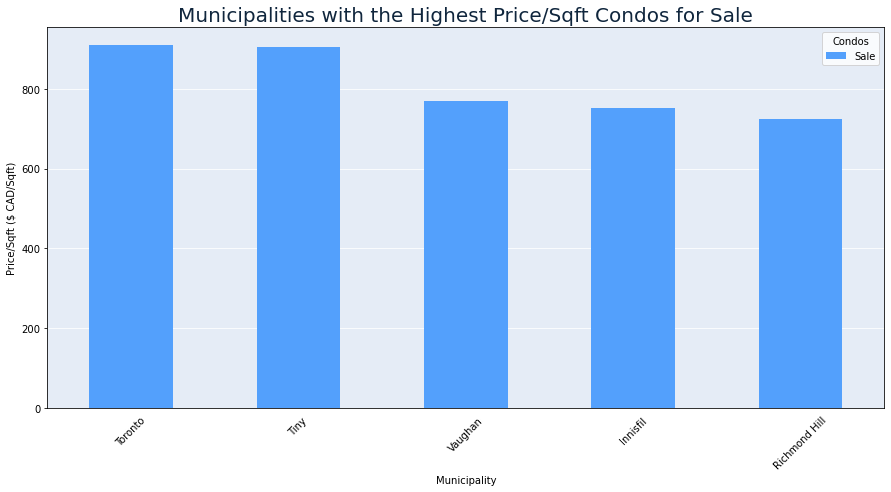

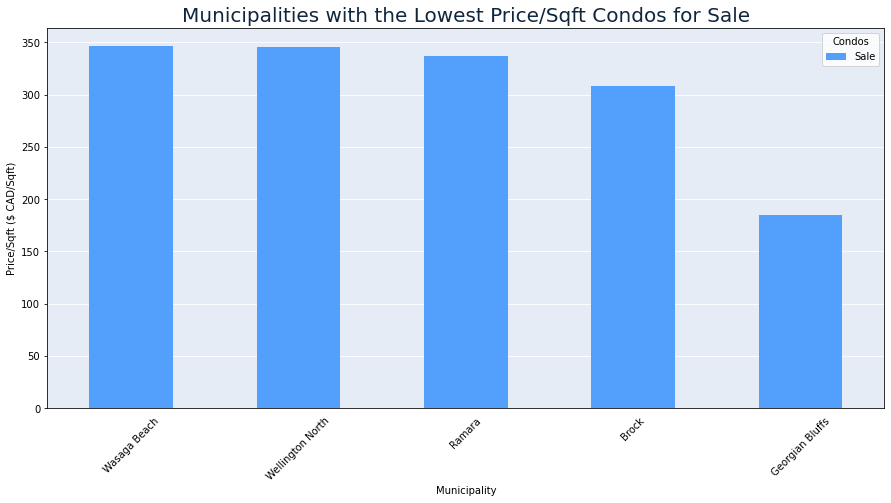

In [33]:
df_sale_sqft = df_sale.copy()
df_sale_sqft['Price/Sqft'] = df_sale_sqft['Lp_dol'].astype(int)/df_sale_sqft['Sqft'].astype(int)

data = df_sale_sqft.groupby('Municipality')['Price/Sqft'].median().sort_values(ascending=False)

#5 highest
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
data[:5].plot.bar(color='#53a0fc')
plt.tick_params(bottom=False)
plt.title('Municipalities with the Highest Price/Sqft Condos for Sale', color='#10263d', fontsize='20')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.ylabel('Price/Sqft ($ CAD/Sqft)')
plt.grid(axis='y', color='white')
plt.legend(['Sale'], title='Condos')
plt.show()

#5 lowest
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
data[-5:].plot.bar(color='#53a0fc')
plt.tick_params(bottom=False)
plt.title('Municipalities with the Lowest Price/Sqft Condos for Sale', color='#10263d', fontsize='20')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.ylabel('Price/Sqft ($ CAD/Sqft)')
plt.grid(axis='y', color='white')
plt.legend(['Sale'], title='Condos')
plt.show()

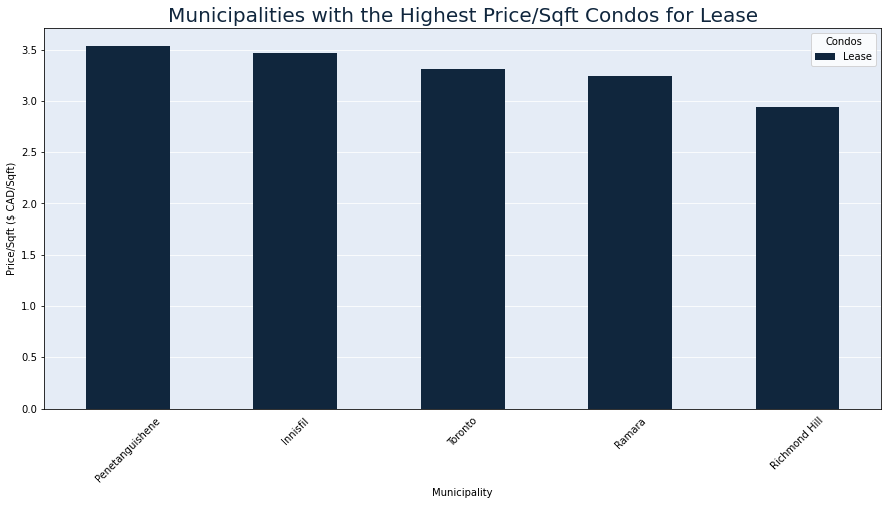

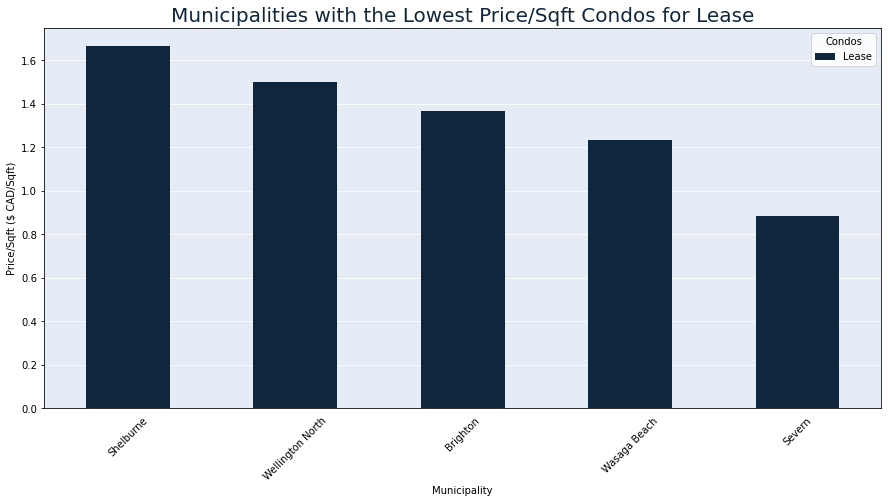

In [34]:
df_lease_sqft = df_lease.copy()
df_lease_sqft['Price/Sqft'] = df_lease_sqft['Lp_dol'].astype(int)/df_lease_sqft['Sqft'].astype(int)

data = df_lease_sqft.groupby('Municipality')['Price/Sqft'].median().sort_values(ascending=False)

#5 highest
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
data[:5].plot.bar(color='#10263d')
plt.tick_params(bottom=False)
plt.title('Municipalities with the Highest Price/Sqft Condos for Lease', color='#10263d', fontsize='20')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.ylabel('Price/Sqft ($ CAD/Sqft)')
plt.grid(axis='y', color='white')
plt.legend(['Lease'], title='Condos')
plt.show()

#5 lowest
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
data[-5:].plot.bar(color='#10263d')
plt.tick_params(bottom=False)
plt.title('Municipalities with the Lowest Price/Sqft Condos for Lease', color='#10263d', fontsize='20')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.ylabel('Price/Sqft ($ CAD/Sqft)')
plt.grid(axis='y', color='white')
plt.legend(['Lease'], title='Condos')
plt.show()

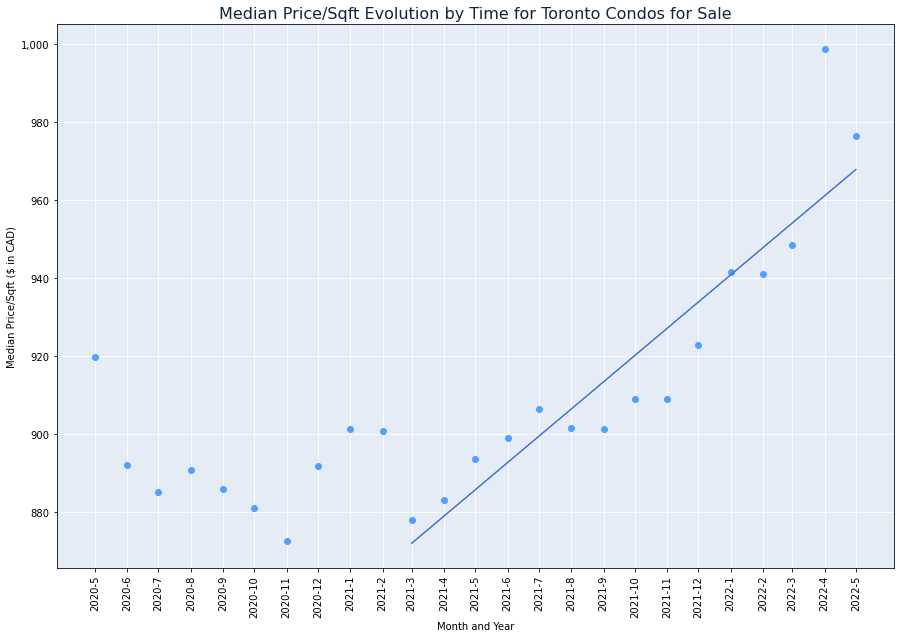

In [35]:
df_sale_toronto = df_sale[df_sale['Municipality']=='Toronto'].copy()
df_sale_toronto['Price/Sqft'] = df_sale_toronto['Lp_dol'].astype(int)/df_sale_toronto['Sqft'].astype(int)

date_min = list((df_sale_toronto['Input_year_month']).unique())[0]
date_max = list((df_sale_toronto['Input_year_month']).unique())[-1]
dates = []
for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
    if year == int(date_min.split('-')[0]):
        x = int(date_min.split('-')[1])
    else:
        x = 1
    while x < 13:
        dates.append('{}-{}'.format(str(year),str(x)))
        if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
            break
        x+=1

medians = []
for x in dates:
    try:
        medians.append(statistics.median(df_sale_toronto.loc[df_sale_toronto['Input_year_month'] == x, 'Price/Sqft']))
    except:
        medians.append(0)

o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
o_dates = [x.toordinal() for x in o_dates]
slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates[10:-1],medians[10:-1])
xf = np.linspace(min(o_dates[10:]),max(o_dates[10:]),100)
yf = (slope*xf)+intercept

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.scatter(o_dates, medians, color='#53a0fc')
plt.plot(xf, yf, color='#4472C4')
plt.yticks(color='black')
plt.xticks(o_dates, dates, rotation = 90, color='black')
plt.xlabel('Month and Year', color='black')
plt.ylabel('Median Price/Sqft ($ in CAD)', color='black')
plt.title('Median Price/Sqft Evolution by Time for Toronto Condos for Sale'.format(line[0],line[1]), color='#10263d', fontsize=16)
plt.grid(axis='y', color='white')
plt.grid(axis='x', color='white')
plt.show()

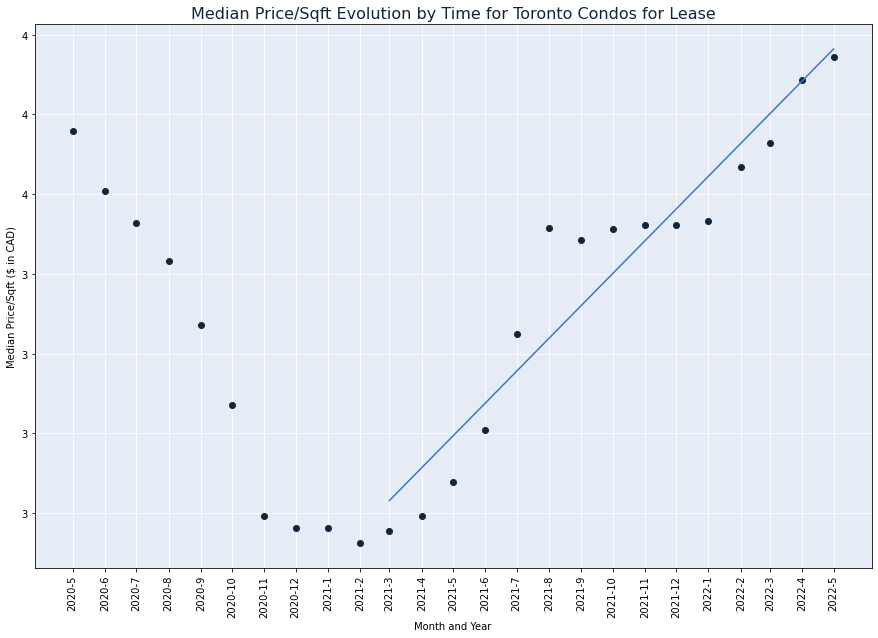

In [36]:
df_lease_toronto = df_lease[df_lease['Municipality']=='Toronto'].copy()
df_lease_toronto['Price/Sqft'] = df_lease_toronto['Lp_dol'].astype(int)/df_lease_toronto['Sqft'].astype(int)

date_min = list((df_lease_toronto['Input_year_month']).unique())[0]
date_max = list((df_lease_toronto['Input_year_month']).unique())[-1]
dates = []
for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
    if year == int(date_min.split('-')[0]):
        x = int(date_min.split('-')[1])
    else:
        x = 1
    while x < 13:
        dates.append('{}-{}'.format(str(year),str(x)))
        if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
            break
        x+=1

medians = []
for x in dates:
    try:
        medians.append(statistics.median(df_lease_toronto.loc[df_lease_toronto['Input_year_month'] == x, 'Price/Sqft']))
    except:
        medians.append(0)

o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2)]), '%Y-%m') for x in dates]
o_dates = [x.toordinal() for x in o_dates]
slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates[10:],medians[10:])
xf = np.linspace(min(o_dates[10:]),max(o_dates[10:]),100)
yf = (slope*xf)+intercept

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.scatter(o_dates, medians, color='#10263d')
plt.plot(xf, yf, color='#4472C4')
plt.yticks(color='black')
plt.xticks(o_dates, dates, rotation = 90, color='black')
plt.xlabel('Month and Year', color='black')
plt.ylabel('Median Price/Sqft ($ in CAD)', color='black')
plt.title('Median Price/Sqft Evolution by Time for Toronto Condos for Lease'.format(line[0],line[1]), color='#10263d', fontsize=16)
plt.grid(axis='y', color='white')
plt.grid(axis='x', color='white')
plt.show()

nan


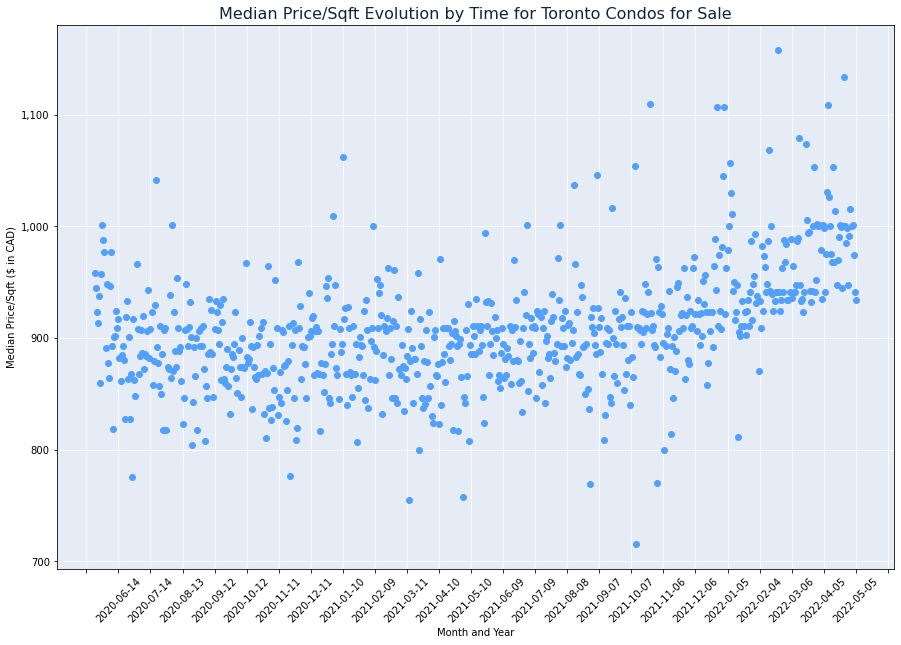

In [37]:
from datetime import date, timedelta

df_sale_toronto = df_sale[df_sale['Municipality']=='Toronto'].copy()
df_sale_toronto['Price/Sqft'] = df_sale_toronto['Lp_dol'].astype(int)/df_sale_toronto['Sqft'].astype(int)
df_sale_toronto['Timestamp_sql'] = df_sale_toronto['Timestamp_sql'].str.split(' ').str[0]

date_min = datetime.strptime(((df_sale_toronto['Timestamp_sql']).unique())[0], '%Y-%m-%d')
date_max = datetime.strptime(((df_sale_toronto['Timestamp_sql']).unique())[-1], '%Y-%m-%d')
dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(date_min,date_max,freq='d')]
first_dates = [x for x in dates if x.endswith('-01')]

medians = []
for x in dates:
    try:
        medians.append(statistics.median(df_sale_toronto.loc[df_sale_toronto['Timestamp_sql'] == x, 'Price/Sqft']))
    except:
        medians.append(np.nan)

o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2), x.split('-')[2]]), '%Y-%m-%d') for x in dates]
o_dates = [x.toordinal() for x in o_dates]
slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates, medians)
xf = np.linspace(min(o_dates),max(o_dates),1000)
yf = (slope*xf)+intercept
print(r_value*r_value)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.scatter(o_dates, medians, color='#53a0fc')
plt.plot(xf, yf, color='#4472C4')
plt.yticks(color='black')
plt.xticks(o_dates, dates, rotation = 45, color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(27))
plt.xlabel('Month and Year', color='black')
plt.ylabel('Median Price/Sqft ($ in CAD)', color='black')
plt.title('Median Price/Sqft Evolution by Time for Toronto Condos for Sale'.format(line[0],line[1]), color='#10263d', fontsize=16)
plt.grid(axis='y', color='white')
plt.grid(axis='x', color='white')
plt.show()

nan


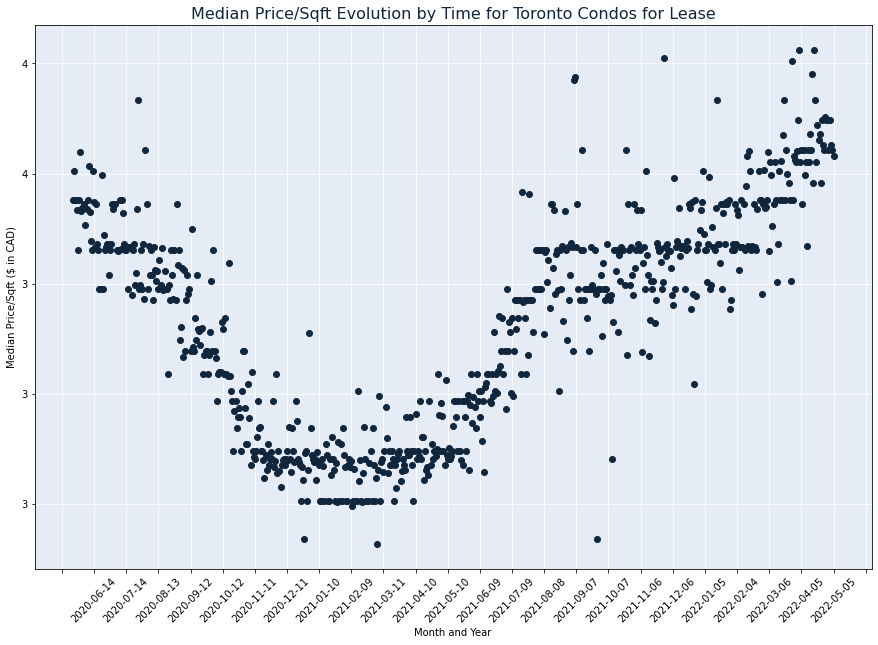

In [38]:
df_lease_toronto = df_lease[df_lease['Municipality']=='Toronto'].copy()
df_lease_toronto['Price/Sqft'] = df_lease_toronto['Lp_dol'].astype(int)/df_lease_toronto['Sqft'].astype(int)
df_lease_toronto['Timestamp_sql'] = df_lease_toronto['Timestamp_sql'].str.split(' ').str[0]

date_min = datetime.strptime(((df_lease_toronto['Timestamp_sql']).unique())[0], '%Y-%m-%d')
date_max = datetime.strptime(((df_lease_toronto['Timestamp_sql']).unique())[-1], '%Y-%m-%d')
dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(date_min,date_max,freq='d')]
first_dates = [x for x in dates if x.endswith('-01')]

medians = []
for x in dates:
    try:
        medians.append(statistics.median(df_lease_toronto.loc[df_lease_toronto['Timestamp_sql'] == x, 'Price/Sqft']))
    except:
        medians.append(np.nan)

o_dates = [datetime.strptime('-'.join([x.split('-')[0], x.split('-')[1].zfill(2), x.split('-')[2]]), '%Y-%m-%d') for x in dates]
o_dates = [x.toordinal() for x in o_dates]
slope, intercept, r_value, p_value, std_err = sp.linregress(o_dates, medians)
xf = np.linspace(min(o_dates),max(o_dates),1000)
yf = (slope*xf)+intercept
print(r_value*r_value)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.scatter(o_dates, medians, color='#10263d')
plt.plot(xf, yf, color='#4472C4')
plt.yticks(color='black')
plt.xticks(o_dates, dates, rotation = 45, color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(27))
plt.xlabel('Month and Year', color='black')
plt.ylabel('Median Price/Sqft ($ in CAD)', color='black')
plt.title('Median Price/Sqft Evolution by Time for Toronto Condos for Lease'.format(line[0],line[1]), color='#10263d', fontsize=16)
plt.grid(axis='y', color='white')
plt.grid(axis='x', color='white')
plt.show()